### BADASS Analysis - can we better tell the difference between butanoic acid, dodecanoic acid, palmitic acid, oleic acid and nervonic acid using a larger array of barrels?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Large array fatty acid data

In [3]:
l_fa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Analysis/Large_array/FAs/Same_plate_FAs/Large_array',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Large_array/FAs/Same_plate_FAs/Large_array already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Large_array/FAs/Same_plate_FAs/Large_array?y


Small array fatty acid data

In [4]:
s_fa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Analysis/Large_array/FAs/Same_plate_FAs/Standard_array',
    control_peptides=['GRP35', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                      'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                      'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                      'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                      'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                      'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                      'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                      'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    control_analytes=[]
)

Directory Analysis/Large_array/FAs/Same_plate_FAs/Standard_array already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Large_array/FAs/Same_plate_FAs/Standard_array?y


Locate xlsx files

In [5]:
l_fa_fluor_data.group_xlsx_repeats()

In [6]:
s_fa_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [7]:
l_fa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/O_repeat_1.xlsx
 WARNING - fluorescence of (O + CCPent-I24K + DPH) is less than fluorescence of (O + DPH) alone. Analysis will continue but please CHECK YOUR DATA. 
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/B_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/P_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/D_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/B_repeat_10.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/D_repeat_10.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_10.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/O_repeat_10.xlsx
 WARNING - fluorescence of (O + GRP52 + DPH) is less than fluorescence of (O + DPH) alone. Analysis will continue but please CHECK YOUR DATA. 
 WARNING - fluorescence of (O + CCPent-I24K + DPH) is less than fluorescence of (O + DPH) alone. Analysis will continue but please CHECK YOUR DATA. 
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/P_repeat_10.xlsx


In [8]:
s_fa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/O_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/B_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/P_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/D_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/D_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Refo

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [9]:
l_fa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: N, 5 (flagged readings = CCPent: 0.16943537676233217, GRP52: 0.06116168052680828) 
 Outlier excluded from final output dataset: O, 8 (flagged readings = CCPent: 0.715122226981689, CCHex2-I24K: 0.7298984369220832, CCHept-I24N: 1.025850279828279, CCHept-L28W: 0.8024693953235129, GRP22: 0.4201989443293729, CCHex: 0.8009377936104601, NLKEIA: 0.4503762960705691, CCHept-L28K: 0.9199052057237955, CCHept-I24T: 0.7484094789503426, CCHept-L7Y: 1.038708261859428, CCHex2: 0.25144269999691565, CCHept-I17G-L21G: 0.5025020784268767, CCHept-I17H: 1.0242690436554487, CCHept-I24H: 0.7386291285565466, CCHept-L28Y: 0.8168417069884344, CCHept-I17A-L21A: 0.7117407900052798, CCHept-L21S-I24S: 0.9652350222314914, CCHept-I24Y: 0.9273765511080094, GRP51: 0.5679799449632448, CCHept-I24D: 0.7141826909380344, CCHept-L14A: 0.6959533474811951, CCHept-L7K: 1.1402495043637098, CCHept-L21N-I24N: 0.7200170187269314, CCHept-L21S-I24Y: 0.9440319306961015, GRP52: 0.6552047682340

In [10]:
s_fa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: N, 5 (flagged readings = CCPent: 0.16943537676233217, GRP52: 0.06116168052680828) 
 Outlier excluded from final output dataset: O, 8 (flagged readings = CCPent: 0.715122226981689, GRP22: 0.4201989443293729, CCHex: 0.8009377936104601, CCHex2: 0.25144269999691565, GRP51: 0.5679799449632448, CCHept-I24D: 0.7141826909380344, GRP52: 0.6552047682340516, CCHept-I24E: 0.7892347226434583, GRP63: 0.9110290681078292, CCHept-I24K: 0.5921408649782045, CCHept-I17K: 0.5593147318816813) 


In [11]:
l_fa_fluor_data.ml_fluor_data

CCPent     QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   0.903368   1.453901     0.554593     1.190752     1.075472  0.489449   
1   0.855617   0.685393     0.576447     1.255267     1.058119  0.540944   
2   1.052817   0.842105     0.963315     1.332277     1.042014  0.515465   
3   0.996725   1.167513     0.710384     1.417928     1.059033  0.515466   
4   0.894747   1.079545     0.732024     1.409620     1.108137  0.502970   
5   0.877188   1.007042     0.679841     1.231749     1.040937  0.502865   
6   0.889601   1.029070     0.719770     1.106825     1.105547  0.487414   
7   0.881351   1.024096     0.678937     1.304746     1.131148  0.533250   
8   0.857674   1.014085     0.818040     1.231109     1.106649  0.484938   
9   0.845154   1.305085     0.698801     1.261290     1.081986  0.490687   
10  0.148266  10.898551     0.046587     0.303799     0.120764  0.024628   
11  0.150689   8.616352     0.031308     0.269366     0.122485  0.022403   
12  0.134739   9.131387     0.042102     0.251902     0.099580  0.022347   
13  0.144157   8.353846     0.032018     0.195077     0.091621  0.023343   
14  0.140496   6.680233     0.035256     0.217786     0.091910  0.027553   
15  0.170604   5.456000     0.014097     0.117293     0.102808  0.025129   
16  0.179082   3.084112     0.021682     0.138316     0.127927  0.026663   
17  0.177250   3.764368     0.047508     0.149798     0.103648  0.027803   
18  0.159486   3.953846     0.016181     0.101732     0.095983  0.024939   
19  1.022571   0.952756     0.753516     1.087744     0.998670  0.631529   
20  1.176855   1.125714     0.652254     1.008486     1.148558  0.657004   
21  1.004083   1.343511     0.757447     1.124091     1.094118  0.668542   
22  0.932209   1.280000     0.688117     0.967367     1.057789  0.697742   
23  0.924206   1.282759     0.777142     1.084270     1.037485  0.685886   
24  0.948754   1.227273     0.878522     1.004671     1.018159  0.698780   
25  1.046289   1.159722     0.832239     1.103595     1.166603  0.720903   
26  1.004783   0.975976     0.861914     1.155559     1.204928  0.726710   
27  1.011156   0.794444     0.790489     1.114545     1.145403  0.732104   
28  0.979291   0.993827     1.014856     1.062500     1.116327  0.744162   
29  0.062063   1.681818     0.008750     0.097138     0.173016  0.019171   
30  0.066087   1.538462     0.006339     0.079017     0.258288  0.018406   
31  0.081692   1.381910     0.005407     0.075357     0.321024  0.022406   
32  0.071201   1.640351     0.003875     0.063482     0.296945  0.022983   
33  0.081579   1.631944     0.006465     0.066950     0.194404  0.024451   
34  0.057734   1.833333     0.011801     0.114172     0.223357  0.016017   
35  0.044842   0.839080     0.005967     0.135403     0.148415  0.010459   
36  0.047362   1.020833     0.005980     0.103364     0.159434  0.012905   
37  0.055282   1.210884     0.008792     0.086595     0.160268  0.015657   
38  0.045607   0.661202     0.006825     0.121669     0.420932  0.006803   
39  0.054125   0.739130     0.005830     0.132827     0.441681  0.006874   
40  0.055639   0.971631     0.006516     0.140290     0.554430  0.008491   
41  0.057048   0.572254     0.006358     0.133426     0.479014  0.009088   
42  0.056074   1.038043     0.009396     0.112380     0.304307  0.008337   
43  0.047794   1.297710     0.008264     0.109551     0.576740  0.009534   
44  0.060709   1.091892     0.009088     0.103913     0.457480  0.011653   
45  0.048991   0.601064     0.005819     0.096681     0.502240  0.007795   
46  0.053244   0.684932     0.006299     0.081320     0.455614  0.008914   
47  0.055839   0.805405     0.007068     0.100139     0.432981  0.009938   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   0.814844  0.563554     0.817677     1.069425  ...          0.748248   
1   0.832793  0.565445     0.902698     1.083152  ...          0.626173   
2   1.108774  0.572330     0.960403     1.113439  ...   

In [12]:
s_fa_fluor_data.ml_fluor_data

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept     GRP51  \
0   0.903368  0.489449  0.814844  0.348957  1.485137  0.491959  0.740981   
1   0.855617  0.540944  0.832793  0.329401  1.743861  0.521996  0.745998   
2   1.052817  0.515465  1.108774  0.253735  1.907134  0.532840  0.666468   
3   0.996725  0.515466  1.072378  0.312879  2.023868  0.522218  0.658861   
4   0.894747  0.502970  1.041062  0.300224  1.744966  0.506945  0.646125   
5   0.877188  0.502865  0.894216  0.262074  1.556552  0.408534  0.787412   
6   0.889601  0.487414  0.648812  0.321964  1.541507  0.470317  0.650548   
7   0.881351  0.533250  1.054857  0.278029  1.841788  0.452056  0.740243   
8   0.857674  0.484938  0.916915  0.295844  2.003040  0.444773  0.702524   
9   0.845154  0.490687  0.974054  0.277357  1.677281  0.493000  0.657182   
10  0.148266  0.024628  0.274981  0.115124  0.962721  0.299053  0.077375   
11  0.150689  0.022403  0.299807  0.109012  1.370370  0.251605  0.083843   
12  0.134739  0.022347  0.251772  0.117537  1.249737  0.337395  0.078243   
13  0.144157  0.023343  0.286811  0.086068  1.397661  0.297689  0.077732   
14  0.140496  0.027553  0.318417  0.086620  1.344584  0.274345  0.068969   
15  0.170604  0.025129  0.296986  0.042631  0.683754  0.266753  0.091161   
16  0.179082  0.026663  0.333001  0.040862  0.810047  0.251251  0.084183   
17  0.177250  0.027803  0.319346  0.050148  0.828720  0.238071  0.078018   
18  0.159486  0.024939  0.326270  0.036215  0.626267  0.284646  0.086710   
19  1.022571  0.631529  0.837688  0.421837  1.755871  0.472208  0.919843   
20  1.176855  0.657004  0.899955  0.445333  1.630830  0.570041  0.904515   
21  1.004083  0.668542  0.994548  0.386495  1.591556  0.572355  0.914612   
22  0.932209  0.697742  0.949528  0.397352  1.616342  0.601395  0.915160   
23  0.924206  0.685886  0.951342  0.457556  1.595443  0.652309  0.878873   
24  0.948754  0.698780  0.810435  0.363183  1.500745  0.519878  0.975358   
25  1.046289  0.720903  0.946354  0.341101  1.562620  0.554000  0.866981   
26  1.004783  0.726710  0.978332  0.357478  1.619072  0.555660  0.829409   
27  1.011156  0.732104  0.980690  0.334027  1.711474  0.614346  0.773844   
28  0.979291  0.744162  0.984101  0.380032  1.696798  0.610648  0.815018   
29  0.062063  0.019171  0.033922  0.021126  2.454878  0.410467  0.084123   
30  0.066087  0.018406  0.025772  0.013037  2.851155  0.394411  0.076990   
31  0.081692  0.022406  0.030396  0.017066  2.459842  0.446497  0.070780   
32  0.071201  0.022983  0.027129  0.008282  3.149968  0.396712  0.071278   
33  0.081579  0.024451  0.027895  0.012213  2.730430  0.403319  0.091607   
34  0.057734  0.016017  0.032250  0.026549  1.580369  0.396653  0.058658   
35  0.044842  0.010459  0.022233  0.020012  2.160352  0.321663  0.064198   
36  0.047362  0.012905  0.020139  0.014109  2.378208  0.308061  0.064648   
37  0.055282  0.015657  0.023123  0.015770  2.438686  0.290587  0.060632   
38  0.045607  0.006803  0.019589  0.016944  1.093735  0.458854  0.129299   
39  0.054125  0.006874  0.017920  0.016273  1.285943  0.494647  0.121183   
40  0.055639  0.008491  0.019490  0.017302  1.242729  0.492987  0.124782   
41  0.057048  0.009088  0.021361  0.014345  1.494451  0.574471  0.128842   
42  0.056074  0.008337  0.029006  0.024482  1.189647  0.595970  0.134948   
43  0.047794  0.009534  0.027447  0.017886  0.733518  0.409876  0.103029   
44  0.060709  0.011653  0.026813  0.019963  1.018495  0.532510  0.119043   
45  0.048991  0.007795  0.021101  0.014395  1.040879  0.428037  0.123532   
46  0.053244  0.008914  0.021006  0.014779  1.120621  0.586371  0.121950   
47  0.055839  0.009938  0.020152  0.019290  1.308267  0.541500  0.139262   

    CCHept-I24D     GRP52  CCHept-I24E     GRP63  CCHept-I24K     GRP80  \
0      1.028922  0.624568     0.902063  1.087951     0.789272  1.237012   
1      0.912267  0.707990     0.878017  0.816183     0.609349  1.034060   
2      0.920470  0.707088     0.871765  0.905182     0.6

In [13]:
l_fa_fluor_data = l_fa_fluor_data.ml_fluor_data
s_fa_fluor_data = s_fa_fluor_data.ml_fluor_data

Generates "representative" fingerprint for each class (by calculating the median for each feature)

D


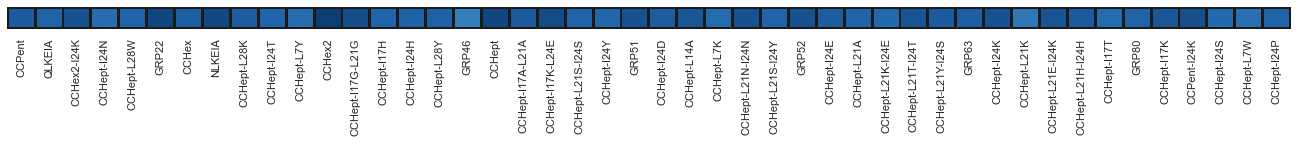

N


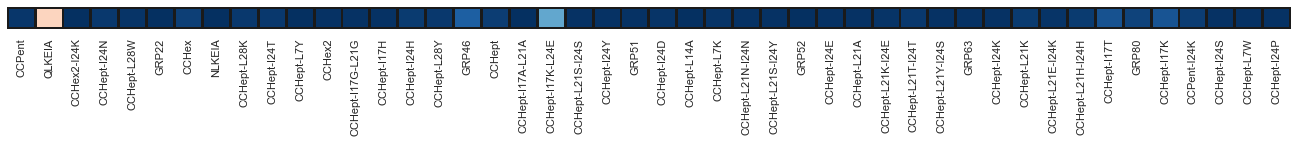

B


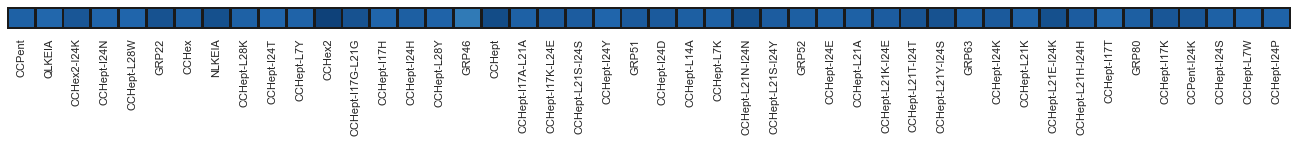

O


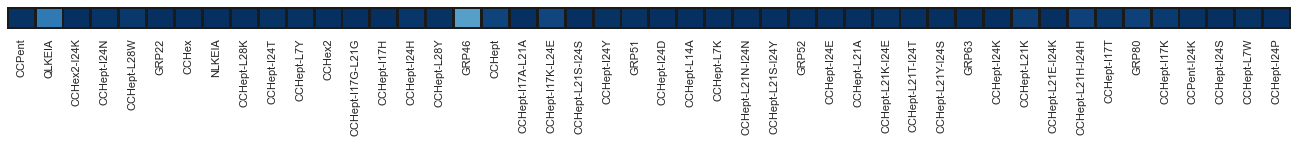

P


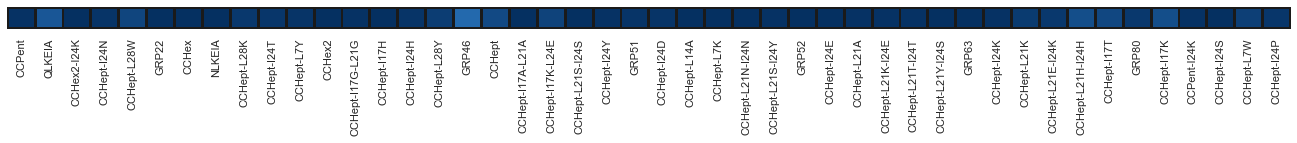

In [14]:
classes = []
for class_name in l_fa_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
l_fa_fluor_data_x_val = l_fa_fluor_data.drop(['Analyte'], axis=1)
vmin = l_fa_fluor_data_x_val.values.min()
vmax = l_fa_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(l_fa_fluor_data.shape[0])
                     if l_fa_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(l_fa_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(23,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=l_fa_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

D


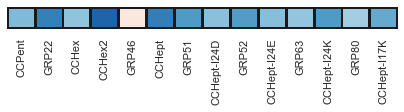

N


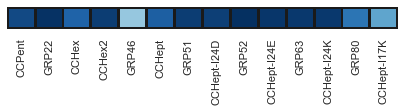

B


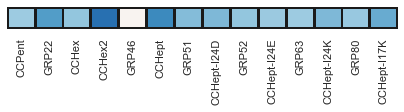

O


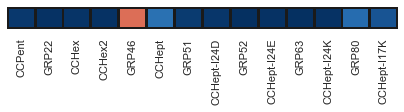

P


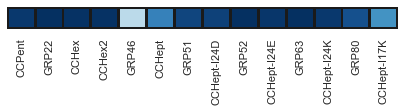

In [15]:
classes = []
for class_name in s_fa_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
s_fa_fluor_data_x_val = s_fa_fluor_data.drop(['Analyte'], axis=1)
vmin = s_fa_fluor_data_x_val.values.min()
vmax = s_fa_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(s_fa_fluor_data.shape[0])
                     if s_fa_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(s_fa_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(7,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=s_fa_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Generates box plots to compare the distribution of values for each class across the 14 / 46 features

Butanoic acid


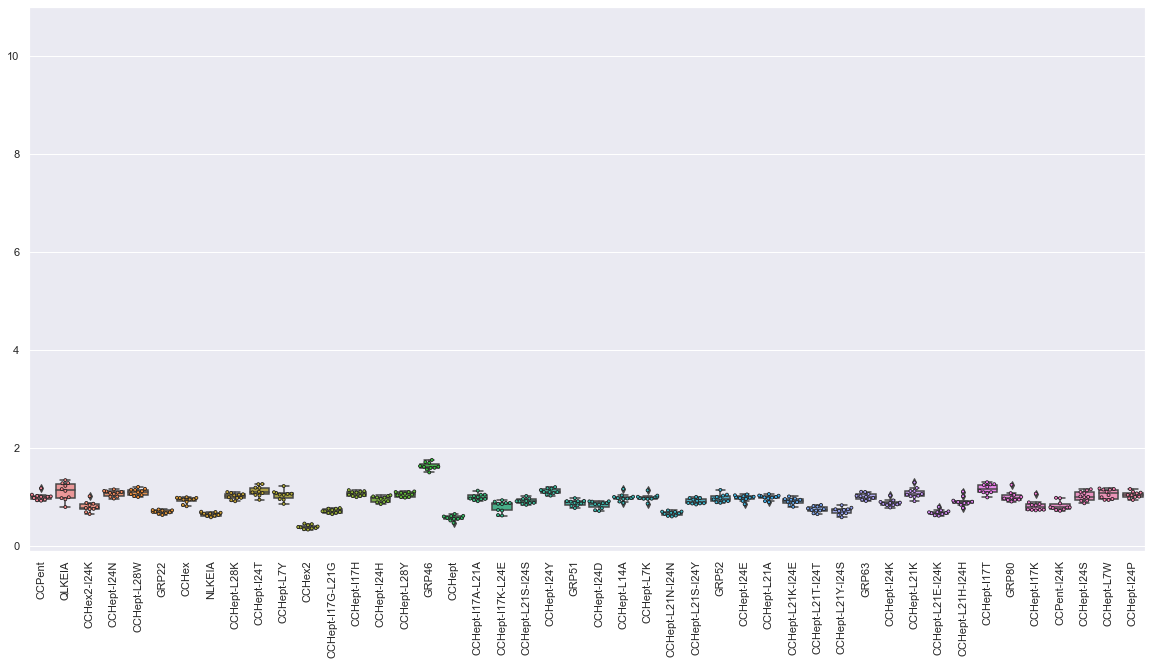

Dodecanoic acid


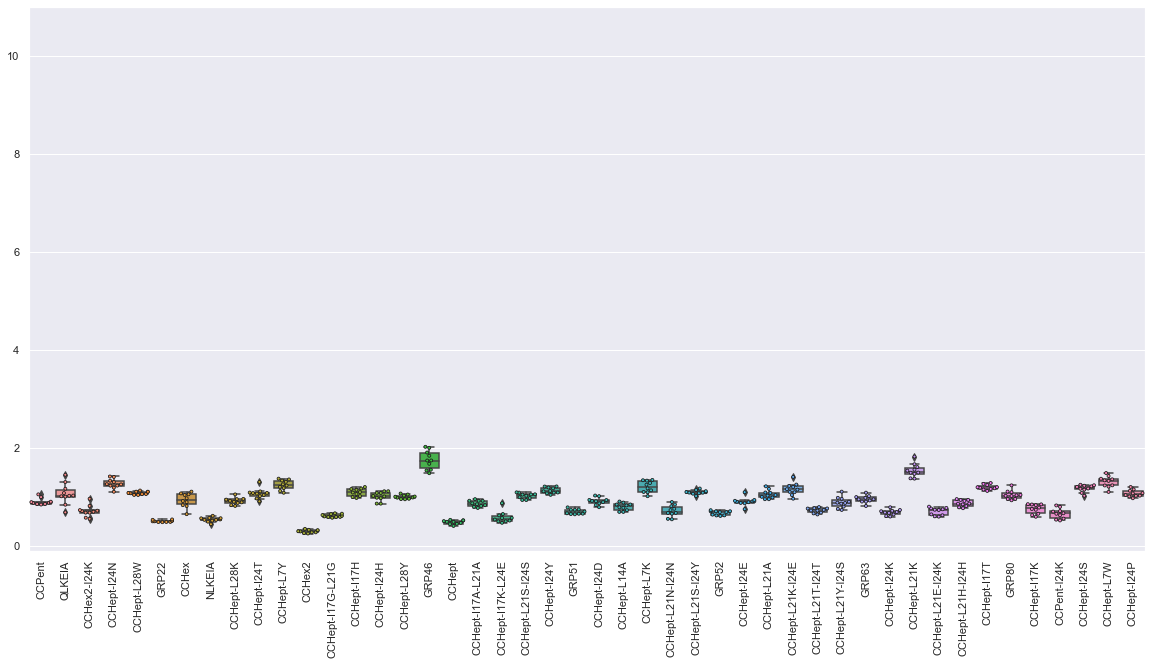

Palmitic acid


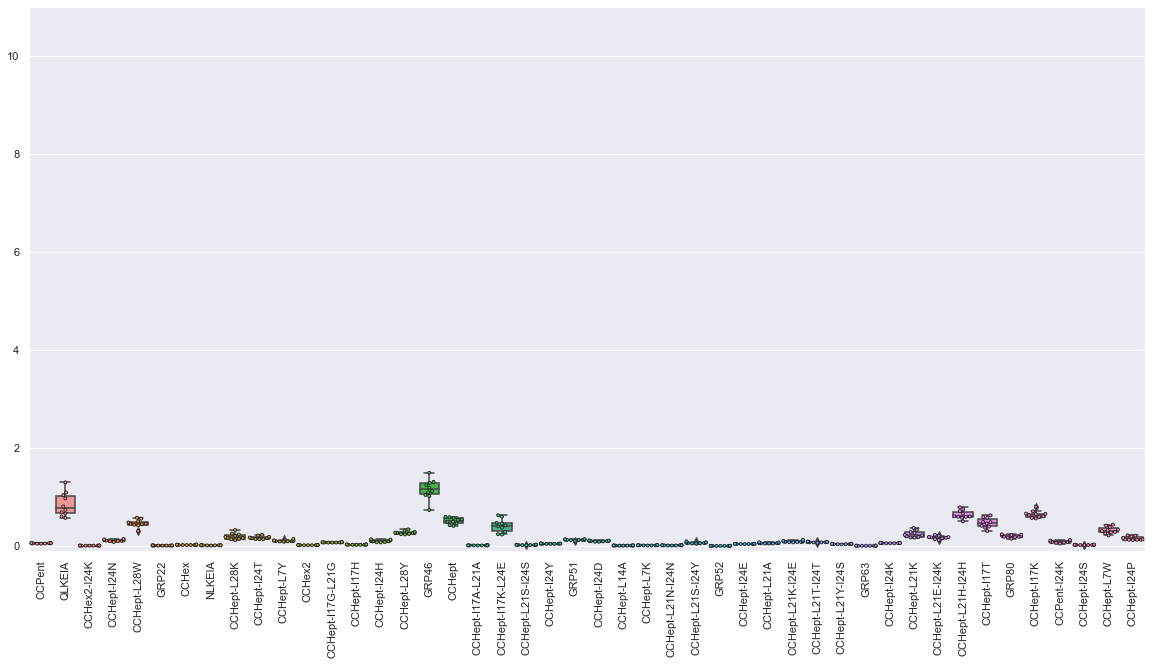

Oleic acid


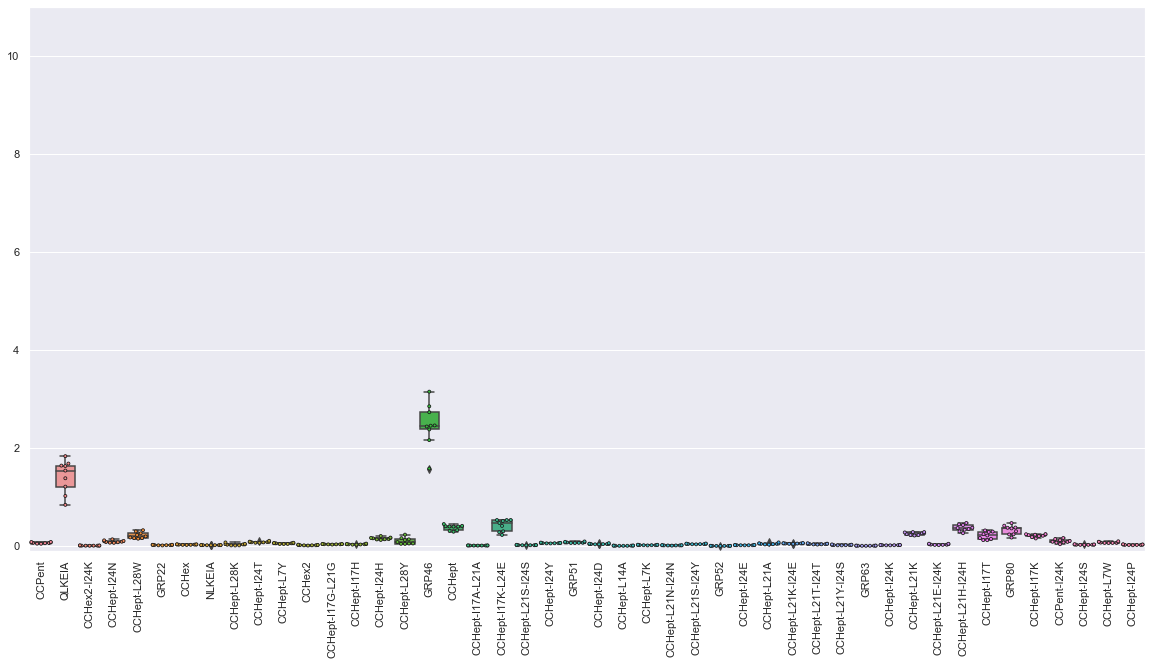

Nervonic acid


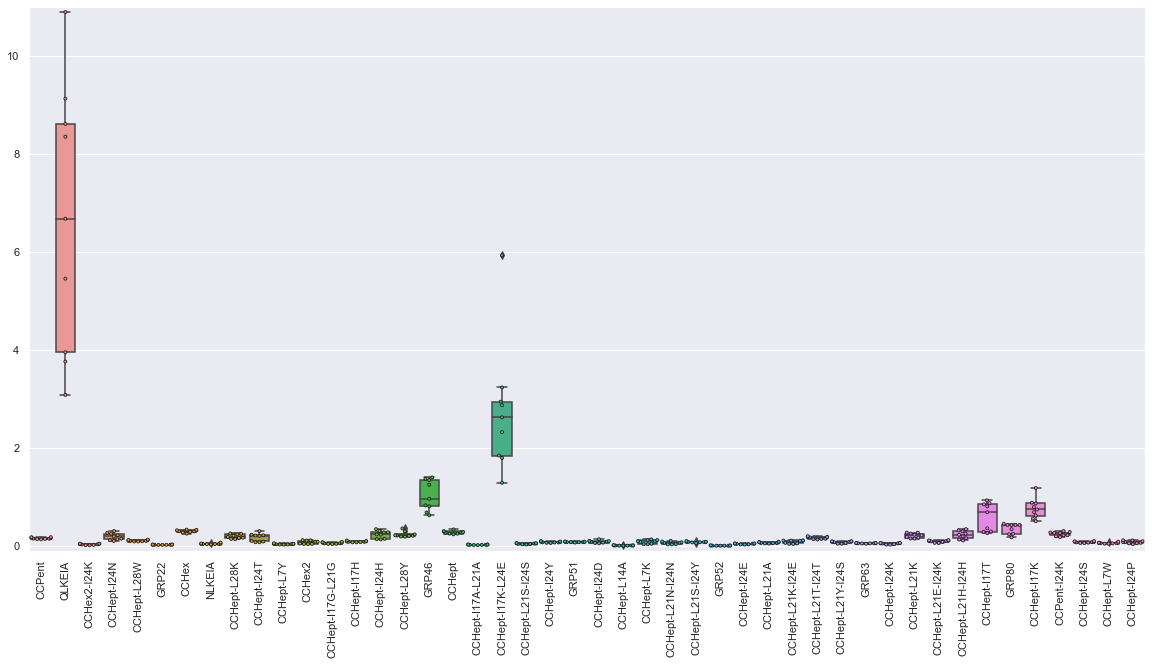

In [16]:
ymin = l_fa_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = l_fa_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

b_indices = [int(i) for i in range(l_fa_fluor_data.shape[0])
             if l_fa_fluor_data['Analyte'][i] == 'B']
dd_indices = [int(i) for i in range(l_fa_fluor_data.shape[0])
              if l_fa_fluor_data['Analyte'][i] == 'D']
p_indices = [int(i) for i in range(l_fa_fluor_data.shape[0])
             if l_fa_fluor_data['Analyte'][i] == 'P']
ol_indices = [int(i) for i in range(l_fa_fluor_data.shape[0])
              if l_fa_fluor_data['Analyte'][i] == 'O']
n_indices = [int(i) for i in range(l_fa_fluor_data.shape[0])
             if l_fa_fluor_data['Analyte'][i] == 'N']

sns.set(rc={'figure.figsize':(20,10)})
print('Butanoic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_fluor_data.iloc[b_indices])
sns.swarmplot(data=l_fa_fluor_data.iloc[b_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Dodecanoic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_fluor_data.iloc[dd_indices])
sns.swarmplot(data=l_fa_fluor_data.iloc[dd_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Palmitic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_fluor_data.iloc[p_indices])
sns.swarmplot(data=l_fa_fluor_data.iloc[p_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Oleic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_fluor_data.iloc[ol_indices])
sns.swarmplot(data=l_fa_fluor_data.iloc[ol_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Nervonic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_fluor_data.iloc[n_indices])
sns.swarmplot(data=l_fa_fluor_data.iloc[n_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

Butanoic acid


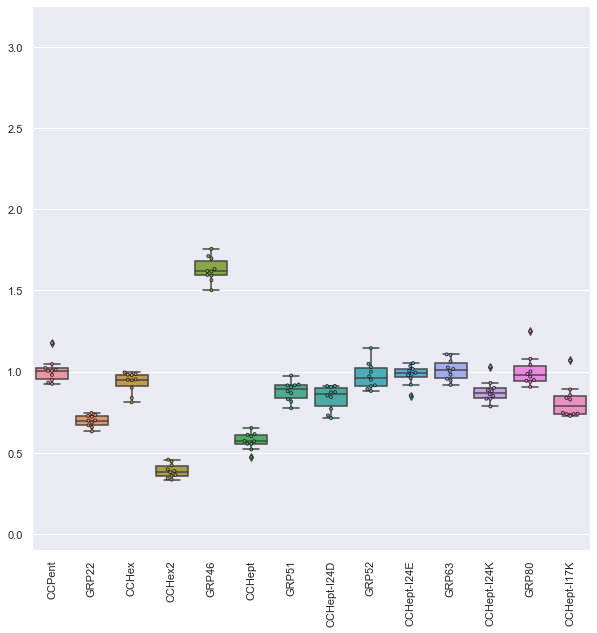

Dodecanoic acid


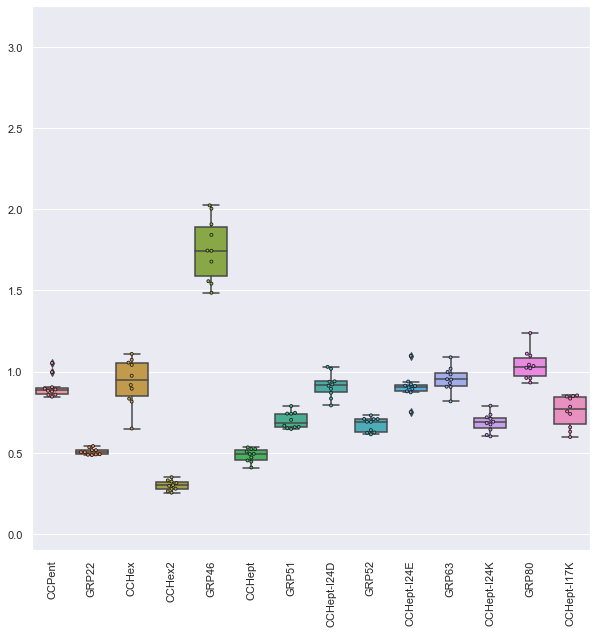

Palmitic acid


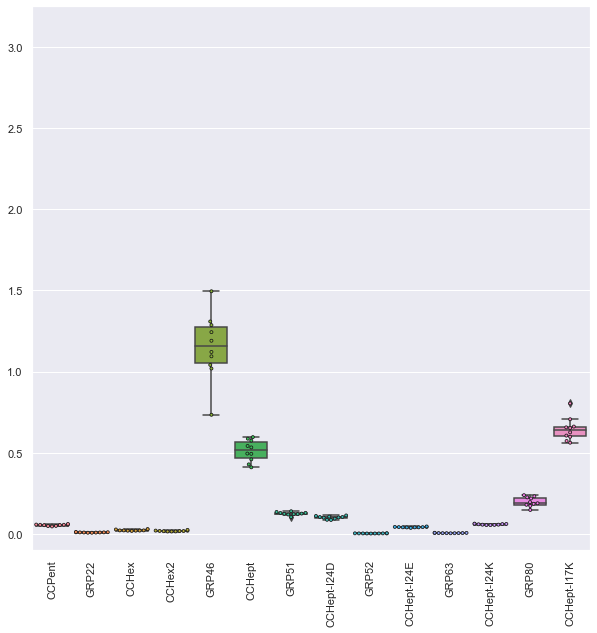

Oleic acid


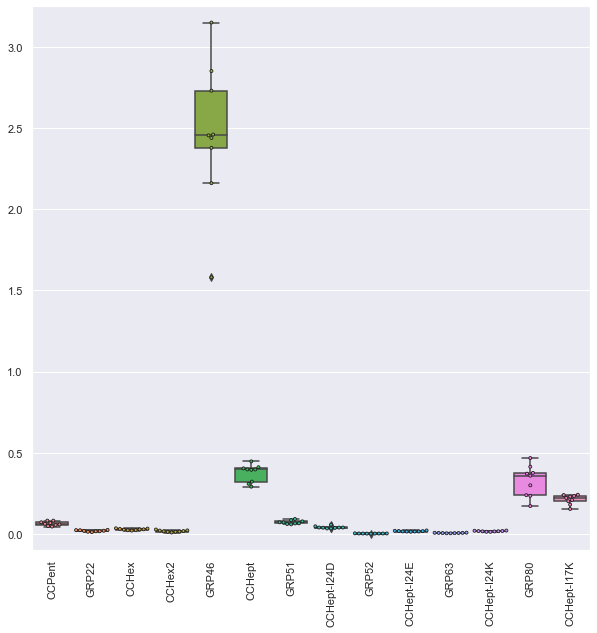

Nervonic acid


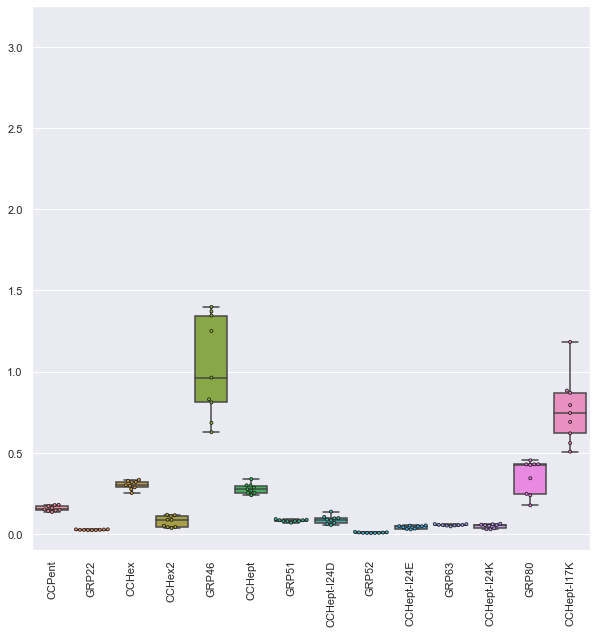

In [57]:
ymin = s_fa_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = s_fa_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

b_indices = [int(i) for i in range(s_fa_fluor_data.shape[0])
             if s_fa_fluor_data['Analyte'][i] == 'B']
dd_indices = [int(i) for i in range(s_fa_fluor_data.shape[0])
              if s_fa_fluor_data['Analyte'][i] == 'D']
p_indices = [int(i) for i in range(s_fa_fluor_data.shape[0])
             if s_fa_fluor_data['Analyte'][i] == 'P']
ol_indices = [int(i) for i in range(s_fa_fluor_data.shape[0])
              if s_fa_fluor_data['Analyte'][i] == 'O']
n_indices = [int(i) for i in range(s_fa_fluor_data.shape[0])
             if s_fa_fluor_data['Analyte'][i] == 'N']

sns.set(rc={'figure.figsize':(10,10)})
print('Butanoic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_fa_fluor_data.iloc[b_indices])
sns.swarmplot(data=s_fa_fluor_data.iloc[b_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Dodecanoic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_fa_fluor_data.iloc[dd_indices])
sns.swarmplot(data=s_fa_fluor_data.iloc[dd_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Palmitic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_fa_fluor_data.iloc[p_indices])
sns.swarmplot(data=s_fa_fluor_data.iloc[p_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Oleic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_fa_fluor_data.iloc[ol_indices])
sns.swarmplot(data=s_fa_fluor_data.iloc[ol_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Nervonic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_fa_fluor_data.iloc[n_indices])
sns.swarmplot(data=s_fa_fluor_data.iloc[n_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

#### Run machine learning

In [18]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

- Large array

First split the data into a training and test set

In [19]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/FAs/'
                'Same_plate_FAs/Large_array_ML_results/', fluor_data=l_fa_fluor_data
)

In [20]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 46 features

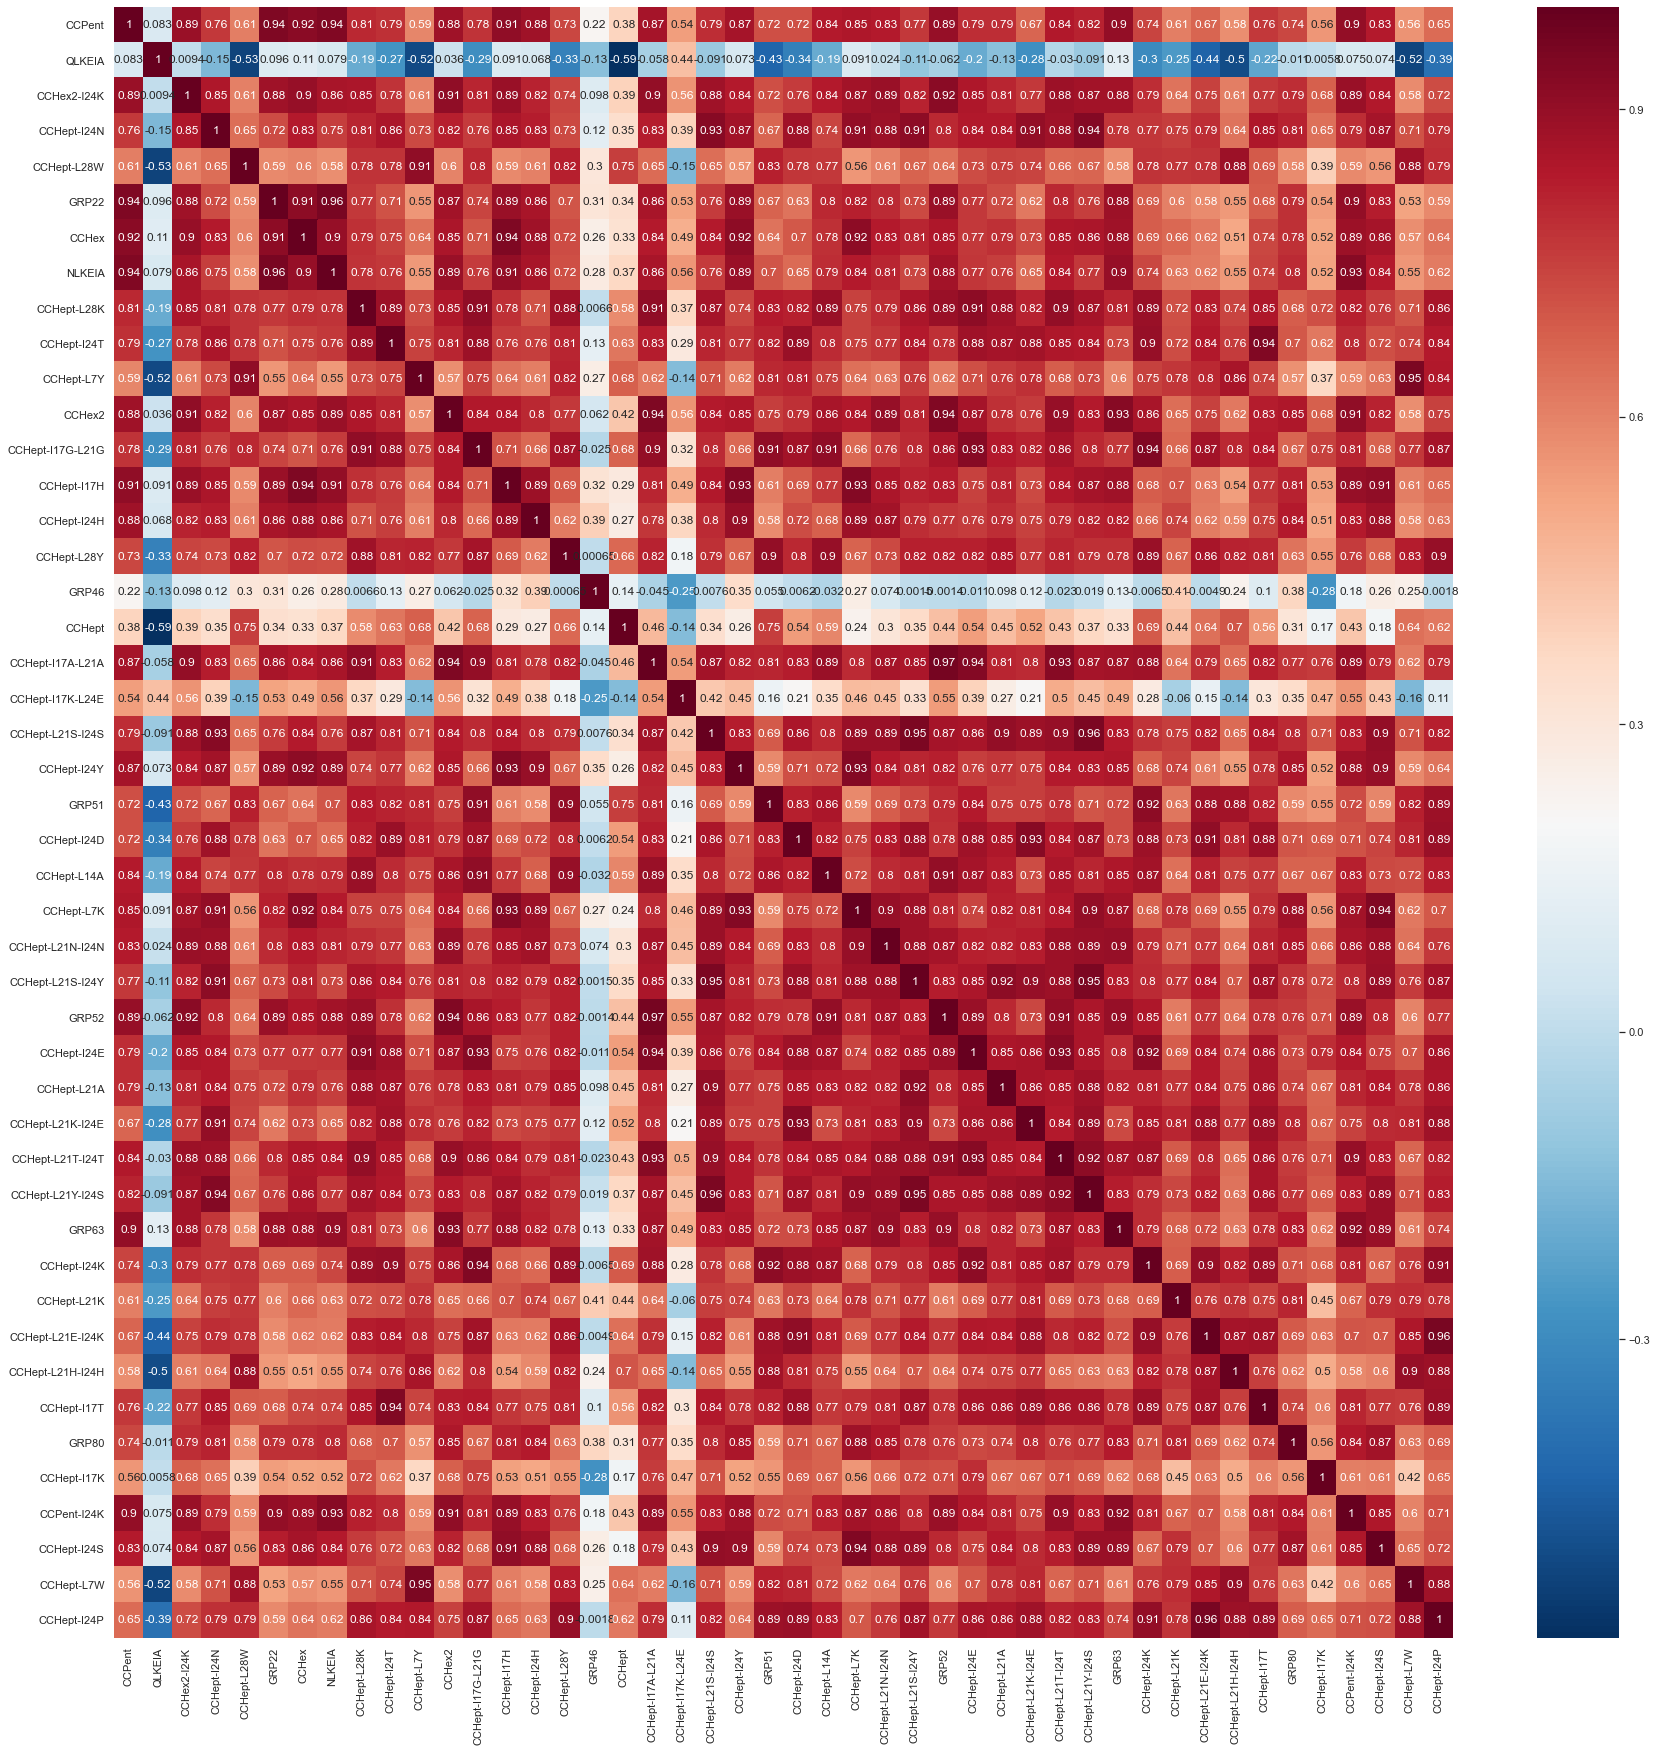

In [21]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
ml.calc_feature_correlations(train_data=ml.fluor_data)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

- Measure the relative importances of the initial 46 features

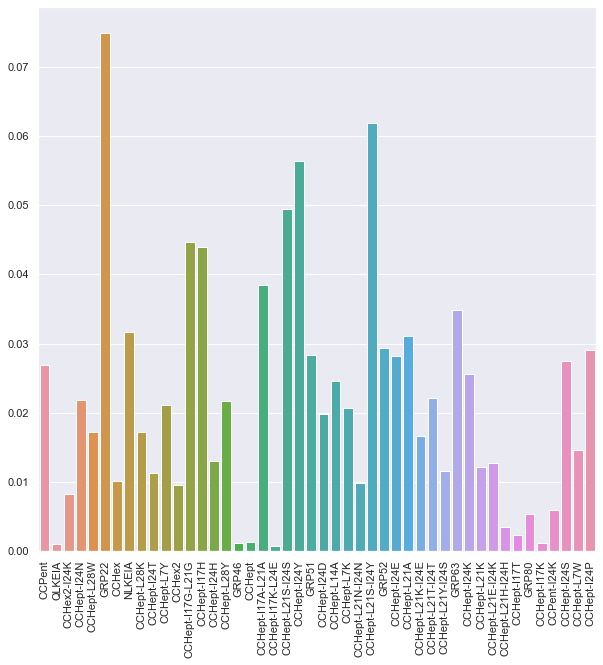

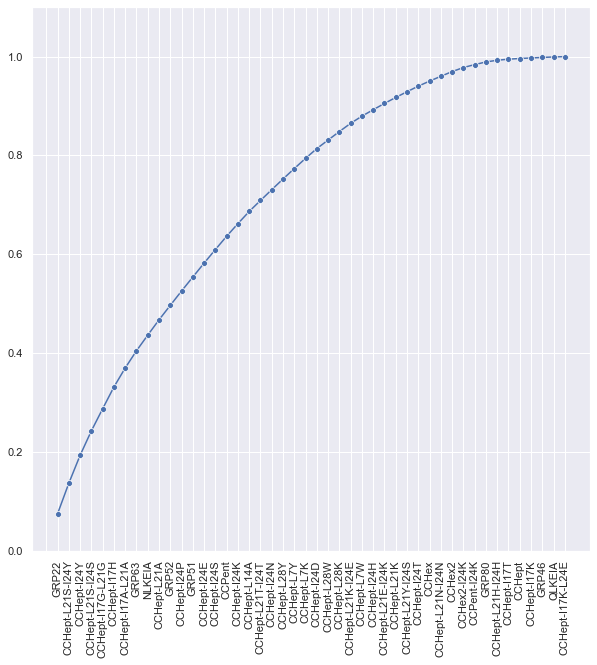

Feature     Score
0              GRP22  0.074946
1   CCHept-L21S-I24Y  0.061865
2        CCHept-I24Y  0.056430
3   CCHept-L21S-I24S  0.049527
4   CCHept-I17G-L21G  0.044702
5        CCHept-I17H  0.044031
6   CCHept-I17A-L21A  0.038442
7              GRP63  0.034793
8             NLKEIA  0.031641
9        CCHept-L21A  0.031026
10             GRP52  0.029295
11       CCHept-I24P  0.029030
12             GRP51  0.028282
13       CCHept-I24E  0.028135
14       CCHept-I24S  0.027477
15            CCPent  0.026924
16       CCHept-I24K  0.025527
17       CCHept-L14A  0.024636
18  CCHept-L21T-I24T  0.022187
19       CCHept-I24N  0.021851
20       CCHept-L28Y  0.021625
21        CCHept-L7Y  0.021119
22        CCHept-L7K  0.020636
23       CCHept-I24D  0.019816
24       CCHept-L28W  0.017222
25       CCHept-L28K  0.017218
26  CCHept-L21K-I24E  0.016614
27        CCHept-L7W  0.014524
28       CCHept-I24H  0.013003
29  CCHept-L21E-I24K  0.012714
30       CCHept-L21K  0.012134
31  CCHept-L21Y-I24S  0.011570
32       CCHept-I24T  0.011317
33             CCHex  0.010157
34  CCHept-L21N-I24N  0.009791
35            CCHex2  0.009484
36       CCHex2-I24K  0.008234
37       CCPent-I24K  0.005896
38             GRP80  0.005384
39  CCHept-L21H-I24H  0.003422
40       CCHept-I17T  0.002220
41            CCHept  0.001336
42       CCHept-I17K  0.001072
43             GRP46  0.001065
44            QLKEIA  0.001004
45  CCHept-I17K-L24E  0.000676

In [22]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

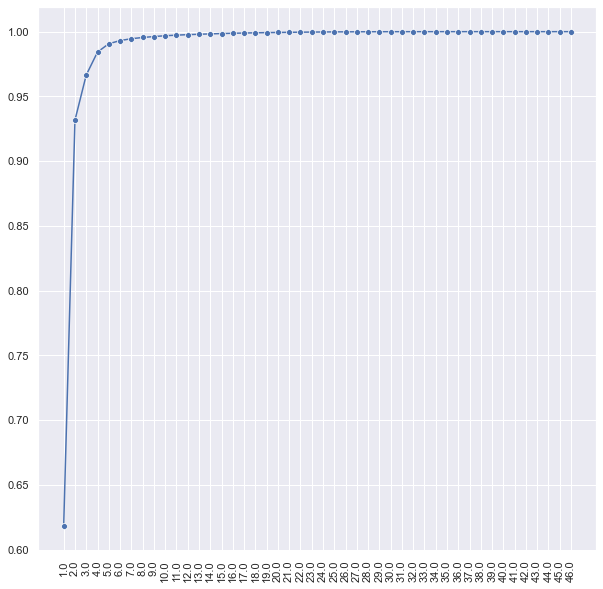

In [23]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 46 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [25]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 47)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [26]:
pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1         -0.114811  0.638879    -0.101387    -0.138219    -0.128177   
2          0.113028  0.687236     0.090551     0.138131     0.065881   
3          0.015775 -0.326504     0.003268    -0.025483    -0.006021   
4          0.029800 -0.070355     0.026942     0.024888    -0.101704   
5         -0.142100 -0.020327    -0.120799     0.165185    -0.042728   
6          0.120831  0.000211     0.083985     0.085942    -0.197312   
7         -0.081214  0.013856    -0.039991    -0.233166    -0.181652   
8         -0.024973 -0.035941    -0.223771    -0.043644    -0.186439   
9         -0.144797  0.020979     0.334714    -0.080783     0.012025   
10         0.151434 -0.014714     0.244268    -0.099782     0.017396   
11         0.018842  0.022832    -0.108276    -0.062973     0.504844   
12         0.271242 -0.009087    -0.142617    -0.148935    -0.087724   
13        -0.033009  0.035345    -0.255786    -0.338636     0.131085   
14         0.073498 -0.008807    -0.097284    -0.071341    -0.092846   
15        -0.101767  0.028636     0.163941     0.135033     0.012105   
16         0.163166  0.022133    -0.013880     0.097070    -0.051375   
17        -0.002755  0.009057    -0.199507    -0.045288     0.156143   
18        -0.129713 -0.005291    -0.255999     0.056426     0.095300   
19         0.030179  0.000601    -0.253611     0.128298    -0.014737   
20         0.191307 -0.001746     0.088437    -0.035866    -0.020569   
21         0.354142  0.019464    -0.118911     0.166837     0.105991   
22        -0.022407 -0.024704    -0.015854    -0.000403     0.035853   
23        -0.105767  0.019262    -0.096518    -0.089251    -0.143287   
24        -0.005852 -0.001028     0.100377    -0.001495    -0.236500   
25        -0.237170  0.004828     0.103931     0.039624    -0.026740   
26         0.043066 -0.004571     0.249173    -0.250378     0.143183   
27        -0.227723  0.001557     0.068790     0.058782     0.462324   
28         0.001761 -0.001062     0.316232    -0.191479    -0.013337   
29         0.004099 -0.009371    -0.081517     0.238015    -0.142338   
30         0.048991 -0.014101    -0.241804    -0.168065    -0.013155   
31        -0.226057 -0.007002    -0.062266     0.226749    -0.201082   
32         0.270038  0.009820    -0.078942     0.025183     0.257624   
33         0.361911  0.001000     0.160351     0.084249    -0.051237   
34        -0.054206 -0.013843     0.152161     0.246511    -0.012917   
35        -0.054289 -0.001561    -0.094612     0.386604     0.038864   
36        -0.045080 -0.001588    -0.000018     0.195794     0.205605   
37        -0.233887  0.001775    -0.024974     0.035684    -0.018885   
38         0.229347  0.000969    -0.001760     0.157367    -0.052129   
39         0.020544  0.004724     0.017247    -0.051497     0.133008   
40        -0.011987  0.002035    -0.023833    -0.164043    -0.044527   
41         0.117851  0.001563     0.184821     0.080683     0.017120   
42         0.131864 -0.002306    -0.089088    -0.192153    -0.102263   
43         0.099115  0.000349    -0.122199     0.108943    -0.021608   
44        -0.227420  0.000078     0.068796    -0.046999    -0.005142   
45        -0.043956 -0.000923    -0.126760    -0.061191    -0.051982   
46         0.013871 -0.000129    -0.022291     0.083223     0.002039   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1         -0.079949 -0.099735 -0.077501    -0.109492    -0.128116  ...   
2          0.069867  0.129911  0.070334     0.108913     0.122347  ...   
3          0.008609  0.030978  0.011423     0.016721    -0.011287  ...   
4          0.016101  0.033092  0.018017    -0.067628    -0.017597  ...   
5         -0.220177 -0.019035 -0.135514    -0.114986    -0.088100  ...   
6          0.049467  0.297443  0.05682

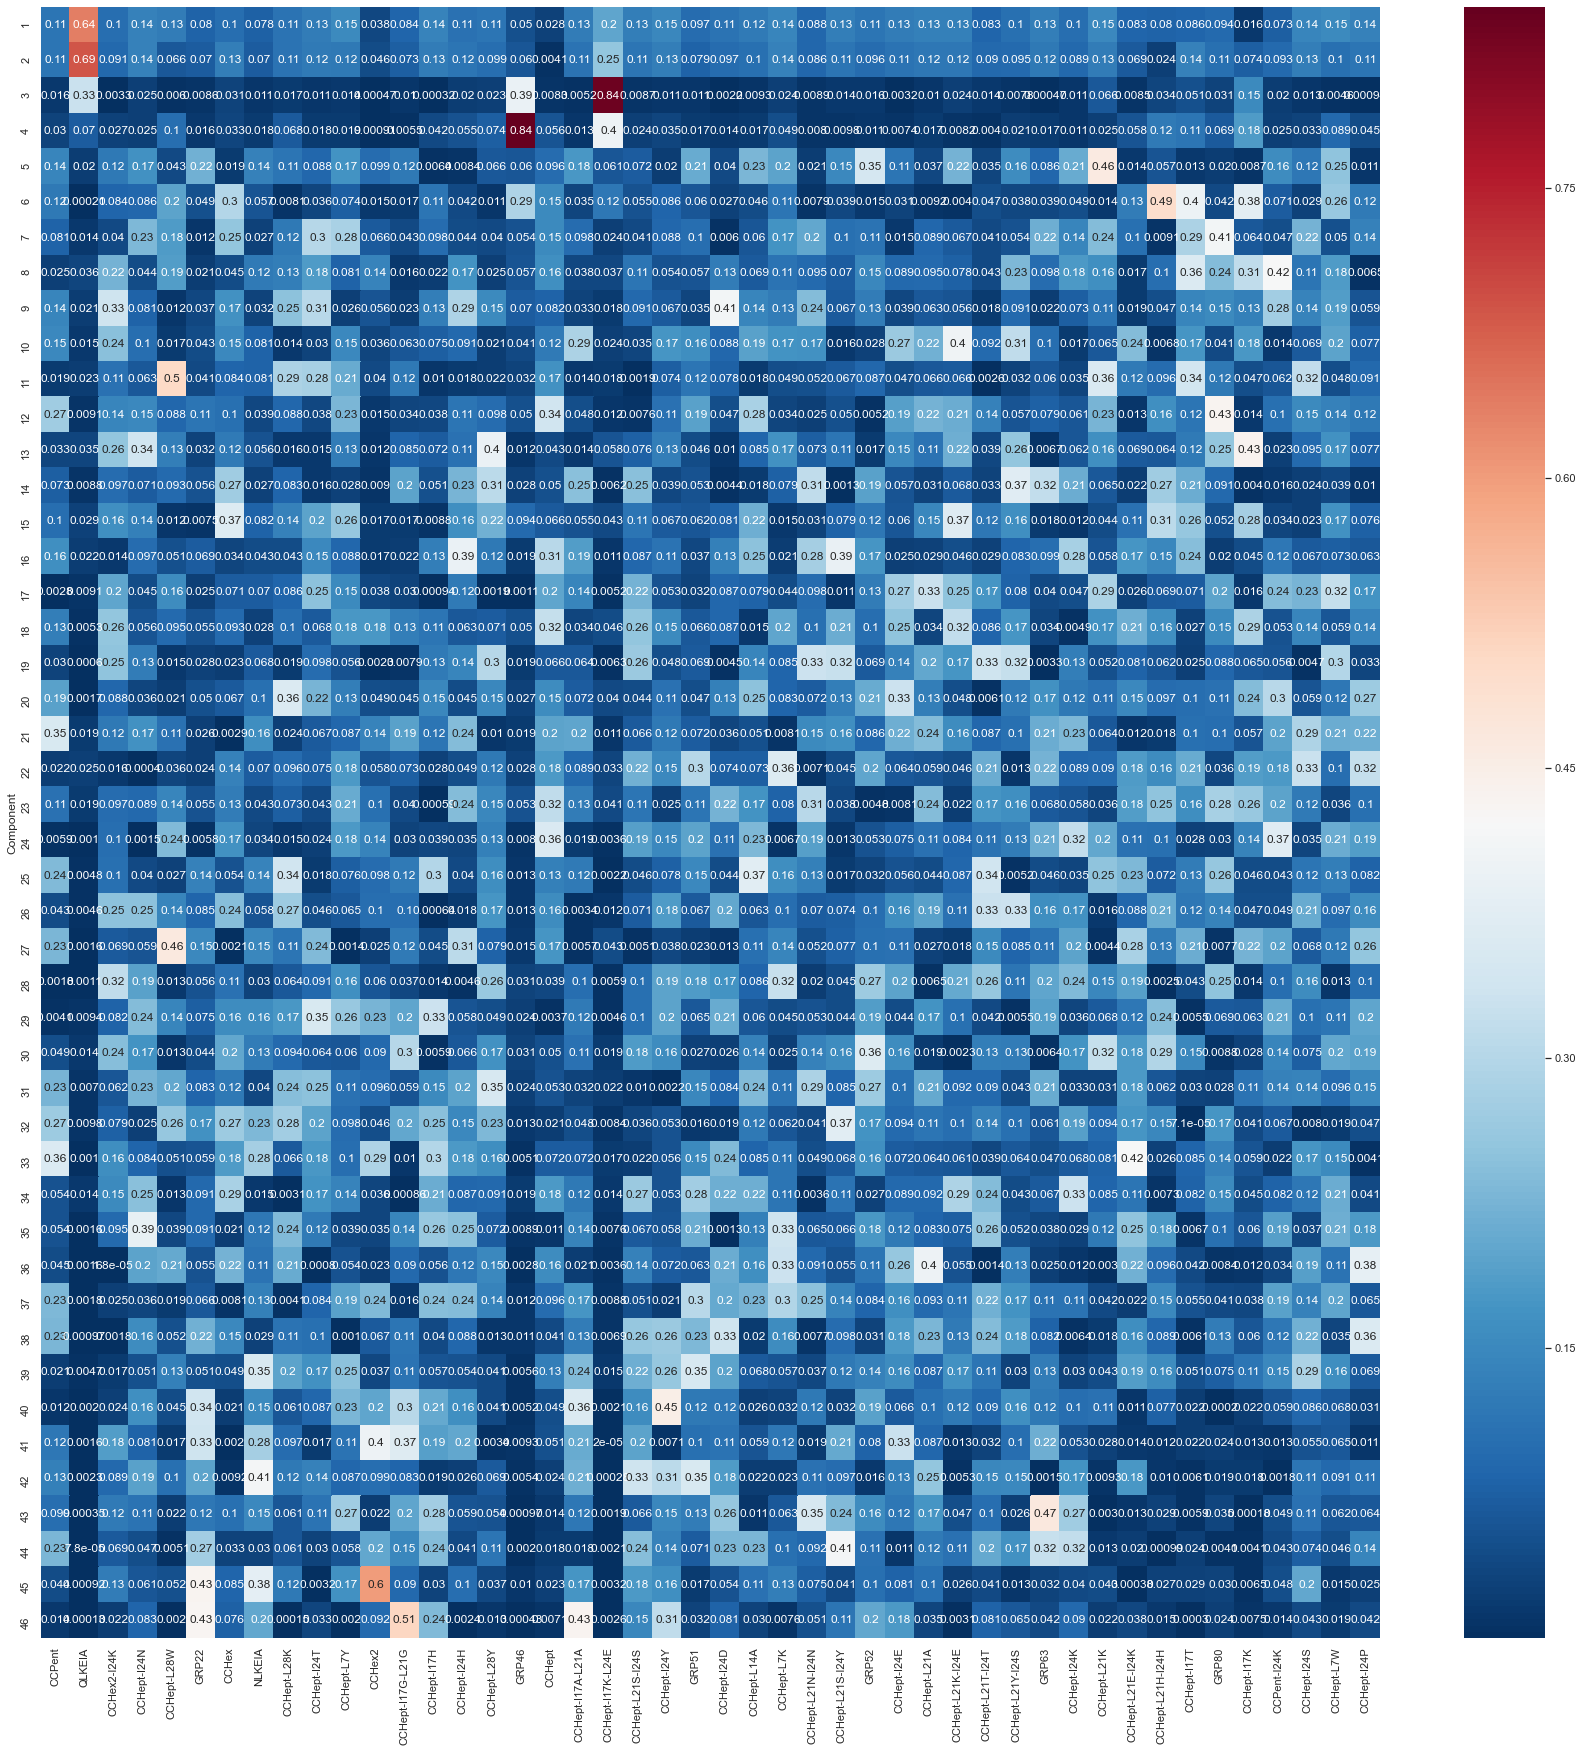

In [27]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

Relative contribution to the different components of each barrel

In [28]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [29]:
relative_pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1          0.022308  0.301053     0.018527     0.025102     0.027596   
2          0.021961  0.323840     0.016547     0.025086     0.014184   
3          0.003065  0.153855     0.000597     0.004628     0.001296   
4          0.005790  0.033153     0.004923     0.004520     0.021896   
5          0.027610  0.009578     0.022075     0.029999     0.009199   
6          0.023478  0.000100     0.015348     0.015608     0.042480   
7          0.015780  0.006529     0.007308     0.042345     0.039109   
8          0.004852  0.016936     0.040892     0.007926     0.040139   
9          0.028134  0.009886     0.061166     0.014671     0.002589   
10         0.029424  0.006934     0.044638     0.018121     0.003745   
11         0.003661  0.010759     0.019786     0.011437     0.108690   
12         0.052703  0.004282     0.026062     0.027048     0.018887   
13         0.006414  0.016655     0.046743     0.061500     0.028222   
14         0.014281  0.004150     0.017778     0.012956     0.019989   
15         0.019773  0.013494     0.029959     0.024523     0.002606   
16         0.031703  0.010430     0.002536     0.017629     0.011061   
17         0.000535  0.004268     0.036458     0.008225     0.033617   
18         0.025203  0.002493     0.046781     0.010248     0.020518   
19         0.005864  0.000283     0.046345     0.023300     0.003173   
20         0.037171  0.000823     0.016161     0.006514     0.004428   
21         0.068810  0.009172     0.021730     0.030299     0.022819   
22         0.004354  0.011641     0.002897     0.000073     0.007719   
23         0.020551  0.009077     0.017638     0.016209     0.030849   
24         0.001137  0.000484     0.018343     0.000272     0.050917   
25         0.046083  0.002275     0.018992     0.007196     0.005757   
26         0.008368  0.002154     0.045534     0.045471     0.030827   
27         0.044247  0.000734     0.012571     0.010675     0.099536   
28         0.000342  0.000500     0.057788     0.034775     0.002871   
29         0.000797  0.004416     0.014896     0.043226     0.030645   
30         0.009519  0.006645     0.044187     0.030522     0.002832   
31         0.043923  0.003300     0.011379     0.041180     0.043292   
32         0.052469  0.004627     0.014426     0.004574     0.055465   
33         0.070320  0.000471     0.029303     0.015300     0.011031   
34         0.010532  0.006523     0.027806     0.044769     0.002781   
35         0.010548  0.000735     0.017289     0.070211     0.008367   
36         0.008759  0.000748     0.000003     0.035558     0.044266   
37         0.045445  0.000836     0.004564     0.006481     0.004066   
38         0.044562  0.000457     0.000322     0.028580     0.011223   
39         0.003992  0.002226     0.003152     0.009352     0.028636   
40         0.002329  0.000959     0.004355     0.029792     0.009586   
41         0.022899  0.000736     0.033774     0.014653     0.003686   
42         0.025621  0.001087     0.016280     0.034897     0.022017   
43         0.019258  0.000164     0.022331     0.019785     0.004652   
44         0.044188  0.000037     0.012572     0.008536     0.001107   
45         0.008541  0.000435     0.023164     0.011113     0.011192   
46         0.002695  0.000061     0.004073     0.015114     0.000439   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1          0.017019  0.018803  0.015170     0.020712     0.024330  ...   
2          0.014873  0.024492  0.013767     0.020603     0.023234  ...   
3          0.001833  0.005840  0.002236     0.003163     0.002143  ...   
4          0.003427  0.006239  0.003527     0.012793     0.003342  ...   
5          0.046870  0.003589  0.026525     0.021751     0.016731  ...   
6          0.010530  0.056077  0.01112

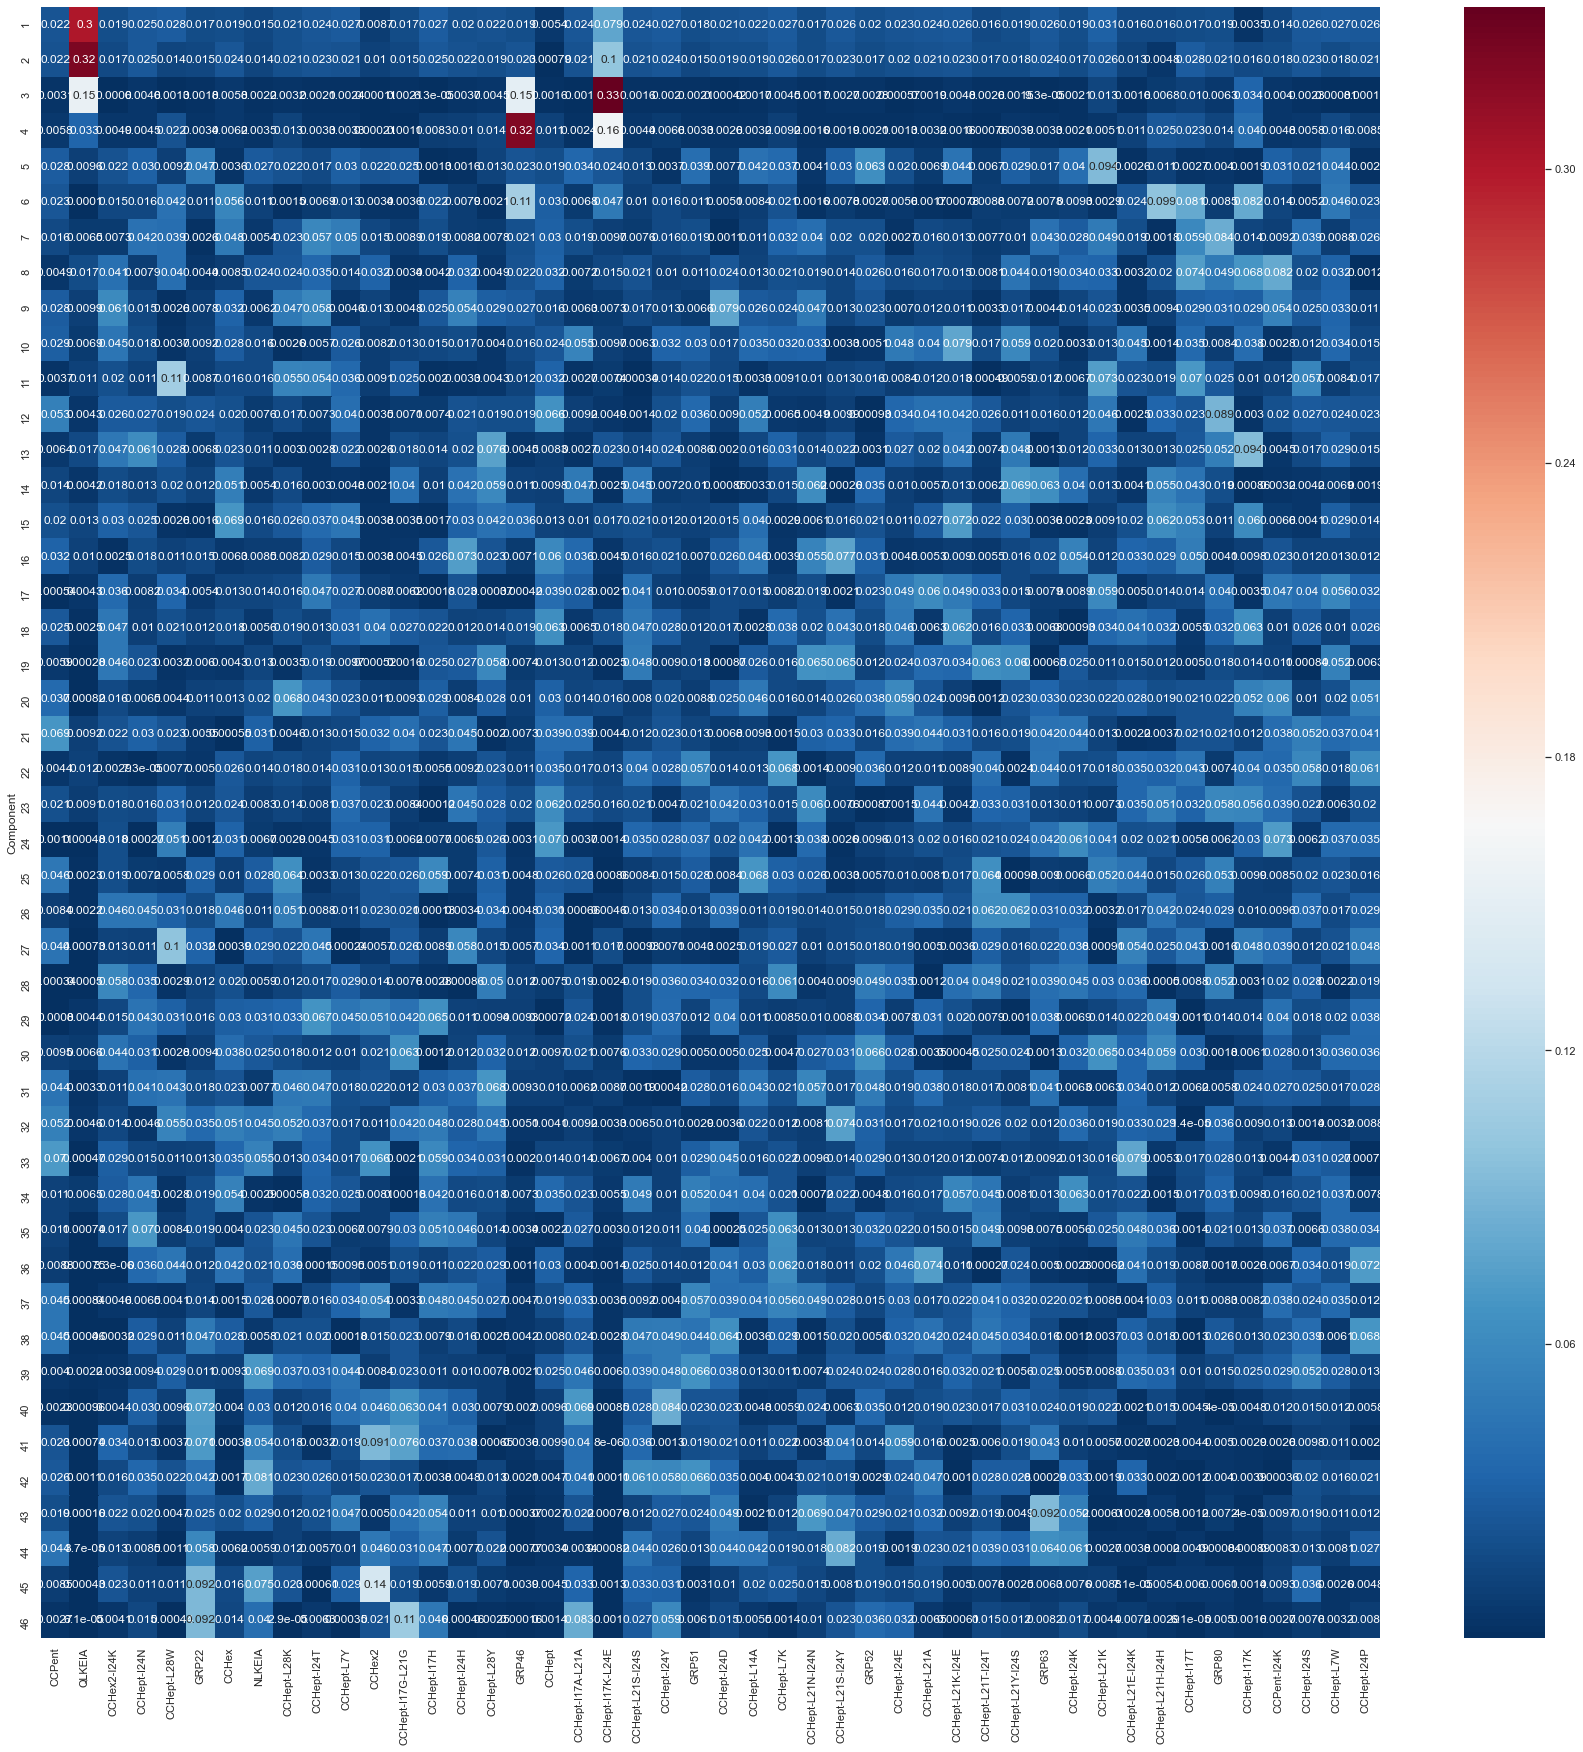

In [30]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [31]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

Scatter plots of data transformed to PCA dimensions

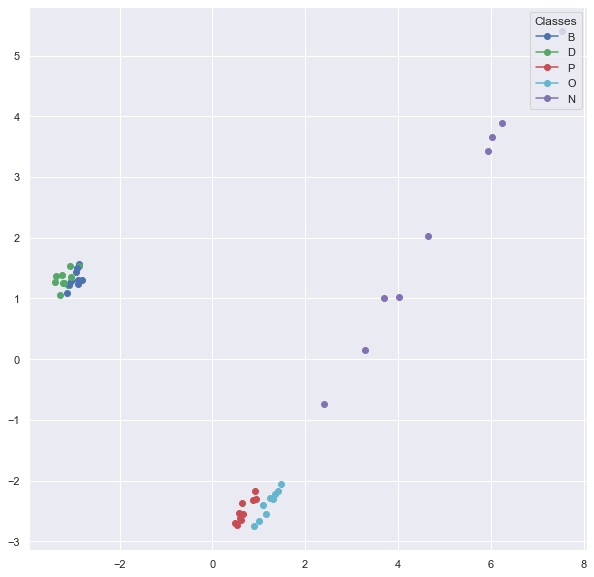

In [32]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['B', 'D', 'P', 'O', 'N'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

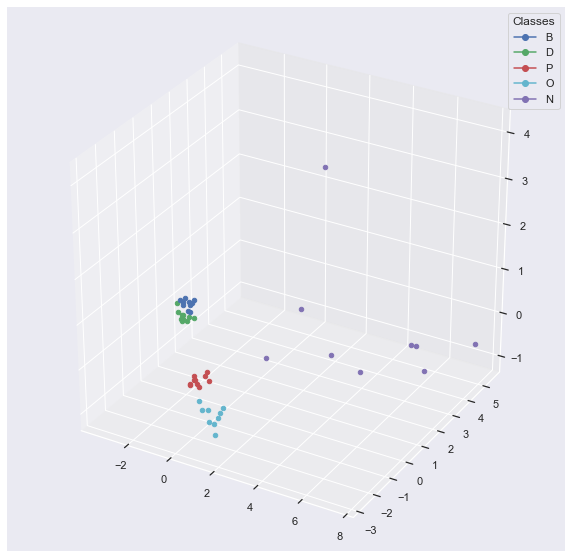

In [33]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['B', 'D', 'P', 'O', 'N'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

3 features required to explain ~98% of the signal. But, for comparison with the AA and sugar large array analysis, will retain all 46 features

In [34]:
n_components = None

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [35]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 3162.2776601683795}
Best score: 1.0






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 3162.2776601683795}
Best score: 1.0
All parameter combinations tested:
1 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 1000.0} nan
2 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 1.0} nan
3 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'Logist

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.125}
Best score: 1.0






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 0.125}
Best score: 1.0
All parameter combinations tested:
1 {'LinearSVC__C': 0.125} 1.0
2 {'LinearSVC__C': 1.4142135623730951} 1.0
3 {'LinearSVC__C': 1.0} 1.0
4 {'LinearSVC__C': 22.627416997969522} 1.0
5 {'LinearSVC__C': 0.1767766952966369} 1.0
6 {'LinearSVC__C': 2.8284271247461903} 1.0
7 {'LinearSVC__C': 5.656854249492381} 1.0
8 {'LinearSVC__C': 0.08838834764831845} 1.0
9 {'LinearSVC__C': 2.0} 1.0
10 {'LinearSVC__C': 362.03867196751236} 1.0
11 {'LinearSVC__C': 0.03125} 1.0
12 {'LinearSVC__C': 8192.0} 1.0
13 {'LinearSVC__C': 1024.0} 1.0
14 {'LinearSVC__C': 11585.237502960395} 1.0
15 {'LinearSVC__C': 256.0} 1.0
16 {'LinearSVC__C': 1448.1546878700494} 1.0
17 {'LinearSVC__C': 32768.0} 1.0
18 {'LinearSVC__C': 64.0} 1.0
19 {'LinearSVC__C': 512.0} 1.0
20 {'LinearSVC__C': 4.0} 1.0
21 {'LinearSVC__C': 128.0} 1.0
22 {'LinearSVC

In [36]:
score_df

Algorithm Resampling_method  \
0    LogisticRegression      no_balancing   
1  KNeighborsClassifier      no_balancing   
2            GaussianNB      no_balancing   
3             LinearSVC      no_balancing   
4                   SVC      no_balancing   

                                         Best_params  Best_accuracy_score  \
0  {'LogisticRegression__solver': 'saga', 'Logist...                  1.0   
1  {'KNeighborsClassifier__weights': 'uniform', '...                  1.0   
2                                                 {}                  1.0   
3                            {'LinearSVC__C': 0.125}                  1.0   
4  {'SVC__gamma': 0.08838834764831845, 'SVC__C': ...                  1.0   

   Mean_accuracy_score  Std_dev_accuracy_score  
0             0.948377                0.019328  
1             1.000000                0.000000  
2             1.000000                0.000000  
3             1.000000                0.000000  
4             0.682429                0.056741

So, from this spot check, all of the algorithms have 100% accuracy.

So, run hyperparameter optimisation for SVC for fairest comparison with standard array data (which I have fitted with a SVC below, and in many of the other notebooks).

In [38]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.04419417382415922, 'SVC__C': 11.313708498984761}
Best score: 1.0


No need for any further hyperparameter optimisation since am already achieving 100% accuracy.

### So, optimal hyperparameter combination:
- C = 11.3
- gamma = 0.044

Model cross-validation score: [1. 1. 1. 1. 1.]
accuracy_score: 1.0
recall_score: 1.0
precision_score: 1.0
f1_score: 1.0
cohen_kappa_score: 1.0
None


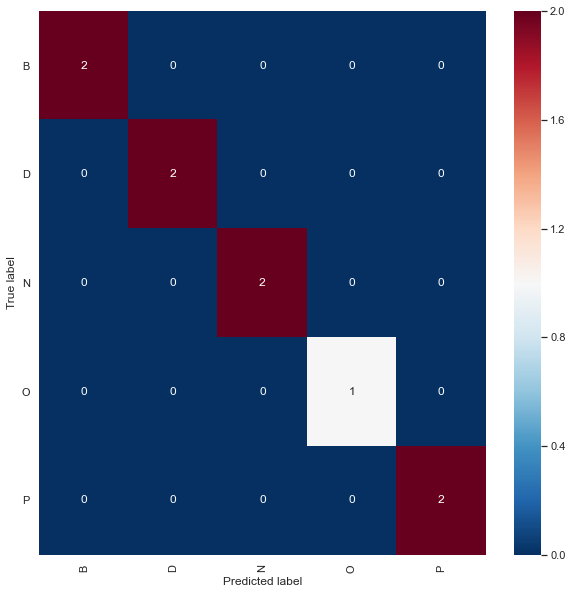

true


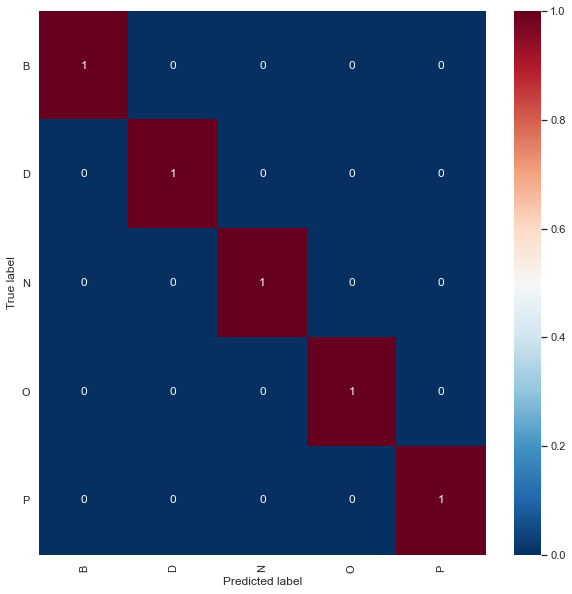

pred


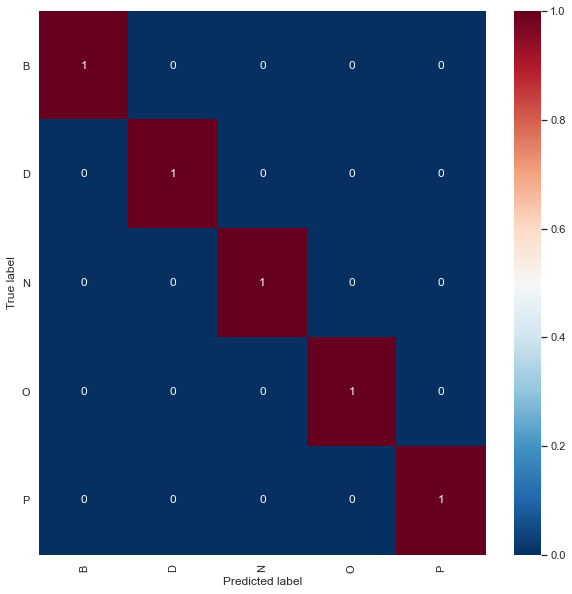

In [39]:
final_params = {'C': 11.3,
                'gamma': 0.044}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

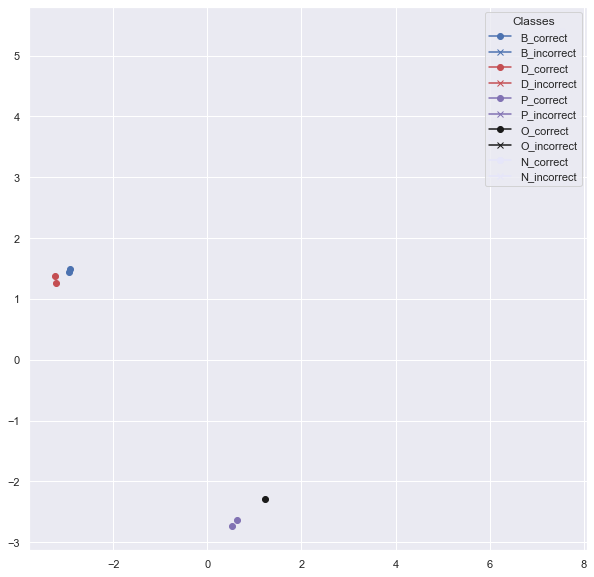

In [42]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['B_correct', 'B_incorrect', 'D_correct', 'D_incorrect', 'P_correct', 'P_incorrect',
                'O_correct', 'O_incorrect', 'N_correct', 'N_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

- Standard array

In [43]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

First split the data into a training and test set

In [44]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/FAs/'
                'Same_plate_FAs/Standard_array_ML_results/', fluor_data=s_fa_fluor_data
)

In [45]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

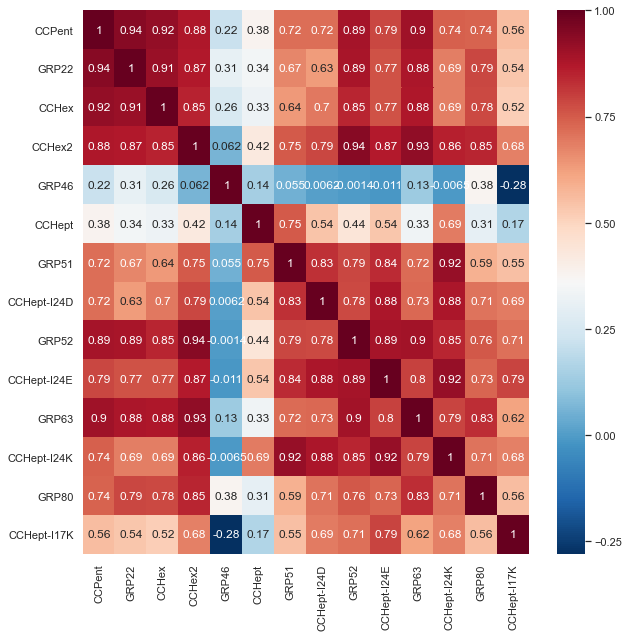

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept  \
CCPent       1.000000  0.944963  0.920321  0.879396  0.220039  0.380265   
GRP22        0.944963  1.000000  0.913048  0.870386  0.306774  0.341185   
CCHex        0.920321  0.913048  1.000000  0.853669  0.255102  0.326205   
CCHex2       0.879396  0.870386  0.853669  1.000000  0.062419  0.422818   
GRP46        0.220039  0.306774  0.255102  0.062419  1.000000  0.142097   
CCHept       0.380265  0.341185  0.326205  0.422818  0.142097  1.000000   
GRP51        0.718628  0.671298  0.637104  0.754342  0.054928  0.751520   
CCHept-I24D  0.715371  0.634824  0.699739  0.785280  0.006188  0.543422   
GRP52        0.894920  0.888515  0.849653  0.940187 -0.001411  0.442683   
CCHept-I24E  0.789405  0.766717  0.768346  0.866261 -0.010747  0.537234   
GRP63        0.904255  0.882219  0.879505  0.927703  0.129179  0.333261   
CCHept-I24K  0.741424  0.687581  0.688993  0.857903 -0.006513  0.692249   
GRP80        0.735128  0.785714  0.782675  0.846613  0.376791  0.305037   
CCHept-I17K  0.555471  0.538862  0.515632  0.682262 -0.279852  0.167716   

                GRP51  CCHept-I24D     GRP52  CCHept-I24E     GRP63  \
CCPent       0.718628     0.715371  0.894920     0.789405  0.904255   
GRP22        0.671298     0.634824  0.888515     0.766717  0.882219   
CCHex        0.637104     0.699739  0.849653     0.768346  0.879505   
CCHex2       0.754342     0.785280  0.940187     0.866261  0.927703   
GRP46        0.054928     0.006188 -0.001411    -0.010747  0.129179   
CCHept       0.751520     0.543422  0.442683     0.537234  0.333261   
GRP51        1.000000     0.825119  0.789622     0.837820  0.722210   
CCHept-I24D  0.825119     1.000000  0.784846     0.880373  0.726118   
GRP52        0.789622     0.784846  1.000000     0.893400  0.896548   
CCHept-I24E  0.837820     0.880373  0.893400     1.000000  0.798415   
GRP63        0.722210     0.726118  0.896548     0.798415  1.000000   
CCHept-I24K  0.916305     0.884498  0.847699     0.916956  0.792336   
GRP80        0.588037     0.706687  0.758576     0.731871  0.832501   
CCHept-I17K  0.554820     0.692683  0.714720     0.792336  0.617781   

             CCHept-I24K     GRP80  CCHept-I17K  
CCPent          0.741424  0.735128     0.555471  
GRP22           0.687581  0.785714     0.538862  
CCHex           0.688993  0.782675     0.515632  
CCHex2          0.857903  0.846613     0.682262  
GRP46          -0.006513  0.376791    -0.279852  
CCHept          0.692249  0.305037     0.167716  
GRP51           0.916305  0.588037     0.554820  
CCHept-I24D     0.884498  0.706687     0.692683  
GRP52           0.847699  0.758576     0.714720  
CCHept-I24E     0.916956  0.731871     0.792336  
GRP63           0.792336  0.832501     0.617781  
CCHept-I24K     1.000000  0.707881     0.682805  
GRP80           0.707881  1.000000     0.557208  
CCHept-I17K     0.682805  0.557208     1.000000

In [46]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

- Measure the relative importances of the initial 14 features

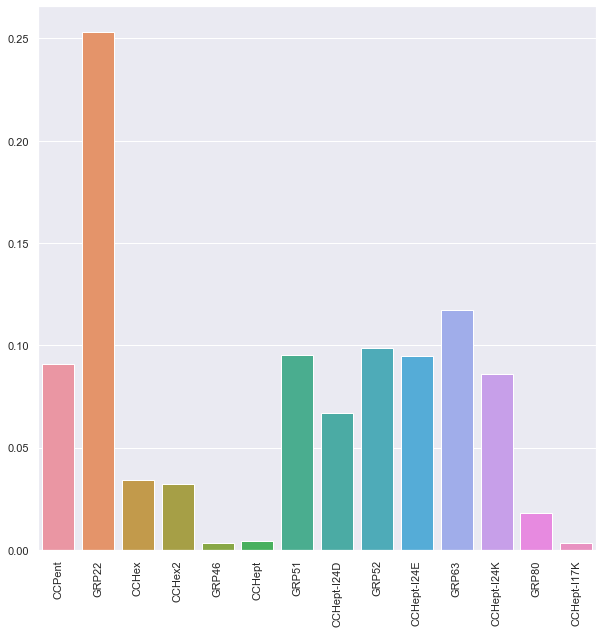

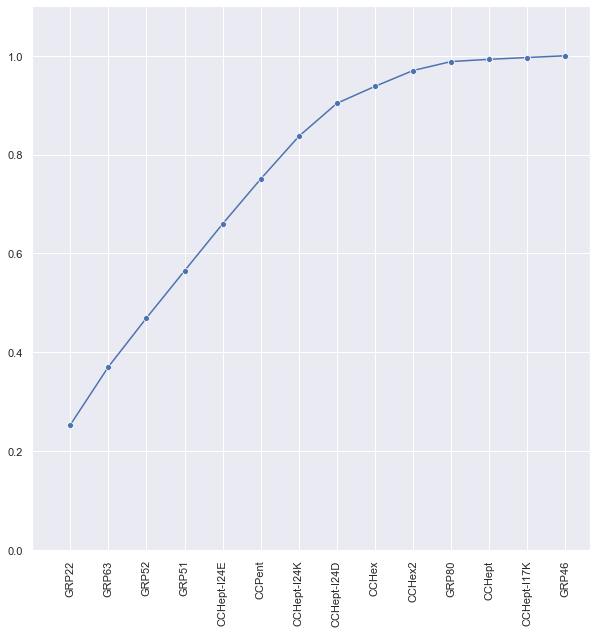

Feature     Score
0         GRP22  0.253011
1         GRP63  0.117458
2         GRP52  0.098897
3         GRP51  0.095477
4   CCHept-I24E  0.094980
5        CCPent  0.090894
6   CCHept-I24K  0.086178
7   CCHept-I24D  0.066897
8         CCHex  0.034289
9        CCHex2  0.032017
10        GRP80  0.018177
11       CCHept  0.004509
12  CCHept-I17K  0.003620
13        GRP46  0.003596

In [47]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

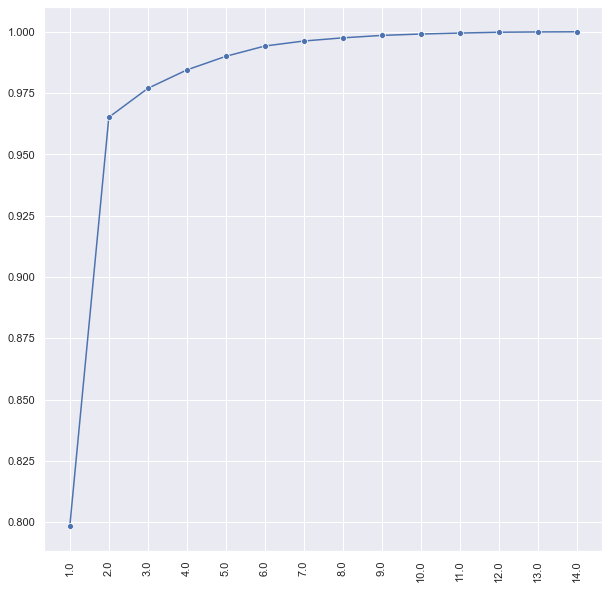

In [48]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [49]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [50]:
pca_components

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept  \
Component                                                               
1          0.337153  0.229126  0.320541  0.121235  0.049259  0.051792   
2         -0.007534  0.005844 -0.055339 -0.013490  0.954541  0.006150   
3         -0.051148  0.214832 -0.494680  0.018348 -0.070669  0.449270   
4         -0.130875  0.008738 -0.229860  0.043950  0.260367 -0.056133   
5         -0.216133 -0.193603 -0.561342  0.015138 -0.067539  0.179226   
6         -0.112271  0.170412 -0.048070  0.238911 -0.070373 -0.290847   
7         -0.095874  0.055954  0.379509  0.070193  0.042630  0.802305   
8          0.443431 -0.149740 -0.069886  0.272900  0.041728 -0.031889   
9          0.494787  0.172576 -0.165887  0.092012 -0.018305  0.128624   
10         0.091885 -0.053810 -0.132496 -0.332952 -0.008324  0.047639   
11         0.413516 -0.274384 -0.160094  0.281084 -0.006210  0.054546   
12         0.300073  0.171995 -0.223231 -0.046987 -0.010927  0.000179   
13         0.269642 -0.436786  0.052839 -0.691649 -0.001439  0.052809   
14         0.119928  0.693422 -0.083614 -0.408932  0.001558 -0.079269   

              GRP51  CCHept-I24D     GRP52  CCHept-I24E     GRP63  \
Component                                                           
1          0.272013     0.307393  0.321848     0.353066  0.373095   
2         -0.009924    -0.011339  0.001930     0.001903  0.002995   
3          0.293506    -0.140154  0.406314     0.042460 -0.050881   
4          0.061125    -0.077543  0.135593    -0.034747 -0.084622   
5          0.026484     0.346885 -0.296182     0.010633  0.241812   
6          0.003922    -0.575603  0.276114    -0.299848  0.053888   
7         -0.148013    -0.250088 -0.180679    -0.145817  0.018614   
8         -0.032073    -0.010553 -0.282868    -0.507470  0.314240   
9         -0.169451     0.330909  0.259810    -0.364714 -0.388876   
10        -0.319487    -0.143788  0.293976    -0.062362  0.685472   
11         0.381160    -0.397601 -0.216608     0.346449  0.004209   
12        -0.646346    -0.211372 -0.126263     0.473324 -0.148461   
13         0.196858    -0.152818  0.116616    -0.102657 -0.204976   
14         0.282471    -0.095542 -0.453793    -0.109605  0.073500   

           CCHept-I24K     GRP80  CCHept-I17K  
Component                                      
1             0.289868  0.285064     0.100338  
2            -0.013088  0.034601    -0.289596  
3             0.226952 -0.373866    -0.181089  
4             0.033247  0.026434     0.904864  
5             0.113695  0.528305    -0.066439  
6             0.165323  0.506753    -0.157812  
7            -0.011497  0.198412     0.122503  
8             0.406865 -0.302057     0.068013  
9            -0.354524  0.238428    -0.006906  
10           -0.409149 -0.074041     0.045788  
11           -0.412576  0.073167     0.012666  
12            0.318255  0.042134     0.026306  
13            0.291171  0.198498     0.010448  
14           -0.088804  0.041189     0.049362

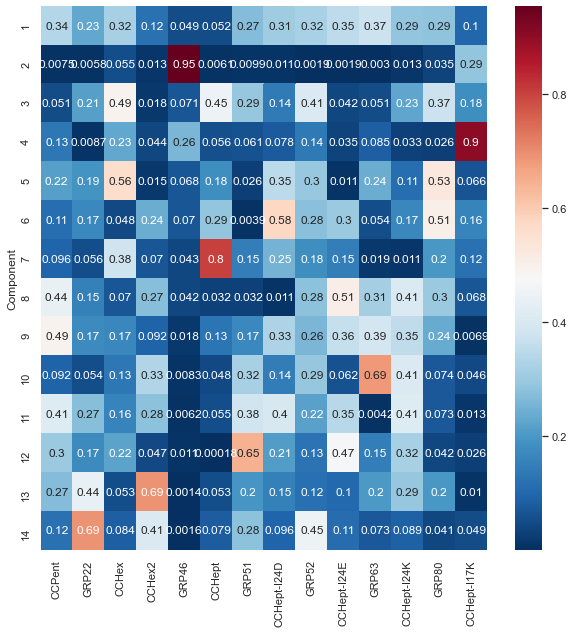

In [51]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Relative contribution to the different components of each barrel

In [52]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [53]:
relative_pca_components

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept  \
Component                                                               
1          0.109314  0.080928  0.107659  0.045787  0.030712  0.023218   
2          0.002443  0.002064  0.018587  0.005095  0.595150  0.002757   
3          0.016584  0.075880  0.166146  0.006930  0.044062  0.201405   
4          0.042433  0.003086  0.077202  0.016599  0.162337  0.025164   
5          0.070076  0.068381  0.188535  0.005717  0.042110  0.080346   
6          0.036401  0.060190  0.016145  0.090231  0.043877  0.130385   
7          0.031085  0.019763  0.127464  0.026510  0.026579  0.359669   
8          0.143773  0.052889  0.023472  0.103067  0.026017  0.014296   
9          0.160424  0.060954  0.055716  0.034751  0.011413  0.057662   
10         0.029792  0.019006  0.044501  0.125747  0.005190  0.021356   
11         0.134073  0.096914  0.053770  0.106158  0.003872  0.024453   
12         0.097292  0.060749  0.074976  0.017746  0.006813  0.000080   
13         0.087425  0.154275  0.017747  0.261218  0.000897  0.023674   
14         0.038884  0.244920  0.028083  0.154443  0.000971  0.035536   

              GRP51  CCHept-I24D     GRP52  CCHept-I24E     GRP63  \
Component                                                           
1          0.095684     0.100732  0.095544     0.123663  0.141023   
2          0.003491     0.003716  0.000573     0.000666  0.001132   
3          0.103244     0.045928  0.120618     0.014872  0.019232   
4          0.021501     0.025411  0.040252     0.012170  0.031985   
5          0.009316     0.113673  0.087924     0.003724  0.091400   
6          0.001380     0.188624  0.081967     0.105024  0.020369   
7          0.052065     0.081954  0.053636     0.051073  0.007036   
8          0.011282     0.003458  0.083972     0.177744  0.118777   
9          0.059606     0.108438  0.077127     0.127743  0.146988   
10         0.112383     0.047119  0.087270     0.021843  0.259095   
11         0.134078     0.130293  0.064302     0.121346  0.001591   
12         0.227360     0.069266  0.037482     0.165785  0.056115   
13         0.069247     0.050078  0.034619     0.035956  0.077477   
14         0.099362     0.031309  0.134713     0.038390  0.027782   

           CCHept-I24K     GRP80  CCHept-I17K  
Component                                      
1             0.092462  0.097526     0.049134  
2             0.004175  0.011838     0.141811  
3             0.072393  0.127907     0.088677  
4             0.010605  0.009044     0.443098  
5             0.036266  0.180744     0.032534  
6             0.052734  0.173371     0.077278  
7             0.003667  0.067881     0.059988  
8             0.129781  0.103340     0.033305  
9             0.113085  0.081571     0.003382  
10            0.130509  0.025331     0.022422  
11            0.131603  0.025032     0.006202  
12            0.101516  0.014415     0.012882  
13            0.092877  0.067910     0.005116  
14            0.028326  0.014092     0.024172

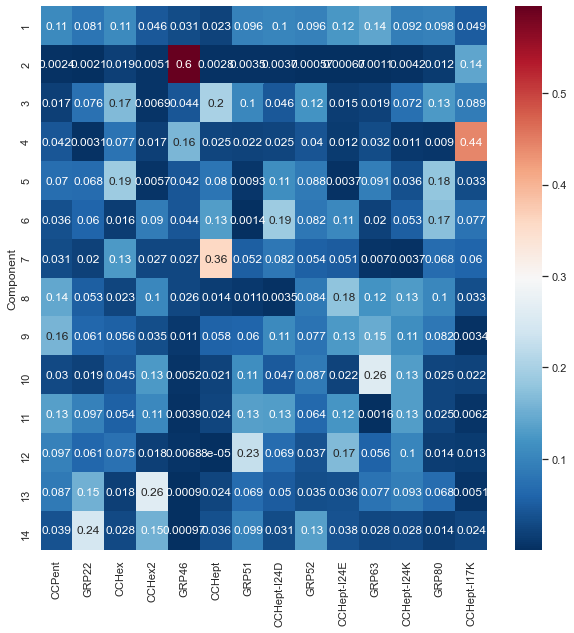

In [54]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

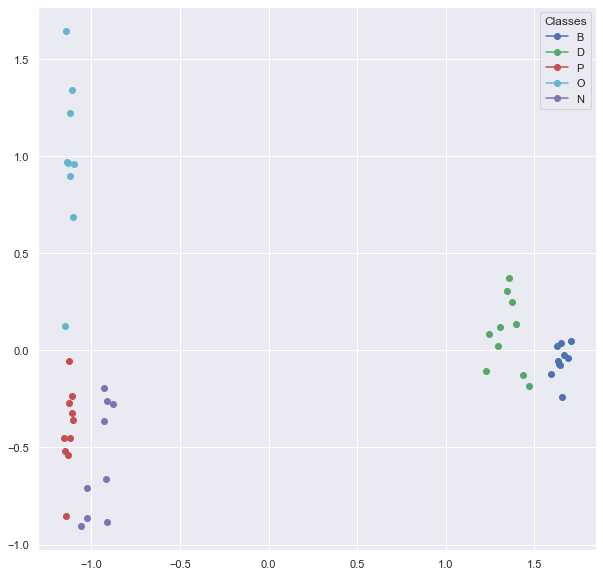

In [56]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 2D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['B', 'D', 'P', 'O', 'N'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

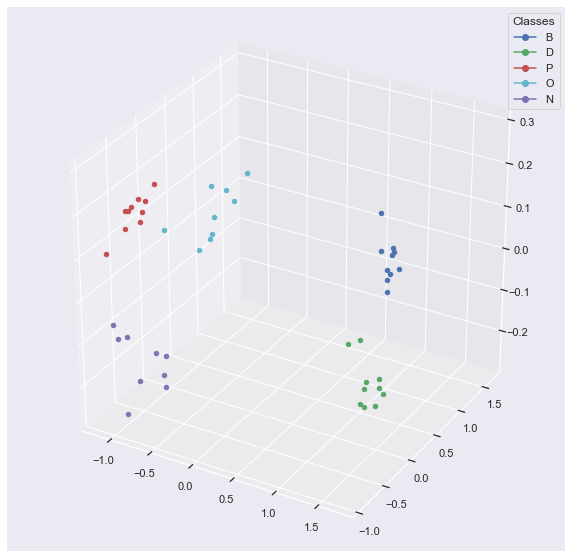

In [59]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['B', 'D', 'P', 'O', 'N'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

3 features required to explain ~98% of the signal. But, for comparison with the AA and sugar large array analysis, will retain all 14 features

In [60]:
n_components = None

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [61]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)  # Actual number of x samples will be
    # different owing to oversampling, but don't want to hard code this selection into the pipeline, so for now
    # this estimate will do
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 31.622776601683793}
Best score: 1.0






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 31.622776601683793}
Best score: 1.0
All parameter combinations tested:
1 {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.0031622776601683794} 0.207
2 {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.31622776601683794} 0.925
3 {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'Log

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 8192.0}
Best score: 1.0






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 8192.0}
Best score: 1.0
All parameter combinations tested:
1 {'LinearSVC__C': 8192.0} 1.0
2 {'LinearSVC__C': 4.0} 1.0
3 {'LinearSVC__C': 0.04419417382415922} 0.975
4 {'LinearSVC__C': 0.03125} 0.975
5 {'LinearSVC__C': 2896.309375740099} 1.0
6 {'LinearSVC__C': 0.125} 1.0
7 {'LinearSVC__C': 0.08838834764831845} 1.0
8 {'LinearSVC__C': 11585.237502960395} 1.0
9 {'LinearSVC__C': 11.313708498984761} 1.0
10 {'LinearSVC__C': 32768.0} 1.0
11 {'LinearSVC__C': 45.254833995939045} 1.0
12 {'LinearSVC__C': 0.1767766952966369} 1.0
13 {'LinearSVC__C': 0.3535533905932738} 1.0
14 {'LinearSVC__C': 1448.1546878700494} 1.0
15 {'LinearSVC__C': 724.0773439350247} 1.0
16 {'LinearSVC__C': 4096.0} 1.0
17 {'LinearSVC__C': 2.0} 1.0
18 {'LinearSVC__C': 90.50966799187809} 1.0
19 {'LinearSVC__C': 22.627416997969522} 1.0
20 {'LinearSVC__C': 0.25} 1.0

In [62]:
score_df

Algorithm Resampling_method  \
0    LogisticRegression      no_balancing   
1  KNeighborsClassifier      no_balancing   
2            GaussianNB      no_balancing   
3             LinearSVC      no_balancing   
4                   SVC      no_balancing   

                                         Best_params  Best_accuracy_score  \
0  {'LogisticRegression__solver': 'saga', 'Logist...                  1.0   
1  {'KNeighborsClassifier__weights': 'uniform', '...                  1.0   
2                                                 {}                  1.0   
3                           {'LinearSVC__C': 8192.0}                  1.0   
4            {'SVC__gamma': 0.0625, 'SVC__C': 256.0}                  1.0   

   Mean_accuracy_score  Std_dev_accuracy_score  
0             0.807983                0.042939  
1             0.998958                0.002083  
2             1.000000                0.000000  
3             0.998000                0.004000  
4             0.640714                0.052678

So, from this spot check, all of the algorithms have 100% accuracy.

So, run hyperparameter optimisation for SVC for fairest comparison with standard array data (which I have fitted with an SVC above, and in many of the other notebooks).

In [63]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.00048828125, 'SVC__C': 181.01933598375618}
Best score: 1.0


No need for further hyperparameter optimisation as am already achieving an accurcy of 1

### So, optimal hyperparameter combination:
- C = 181
- gamma = 0.0005

Model cross-validation score: [1. 1. 1. 1. 1.]
accuracy_score: 1.0
recall_score: 1.0
precision_score: 1.0
f1_score: 1.0
cohen_kappa_score: 1.0
None


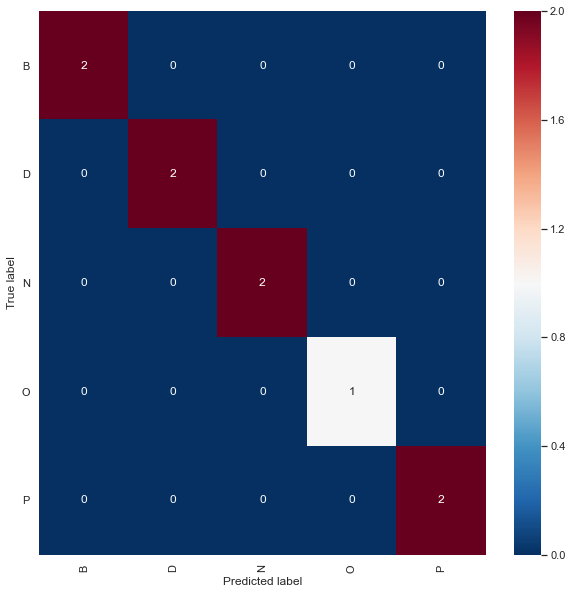

true


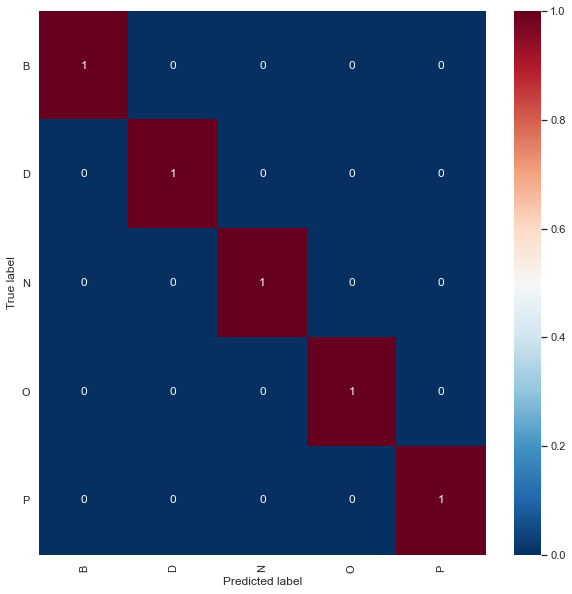

pred


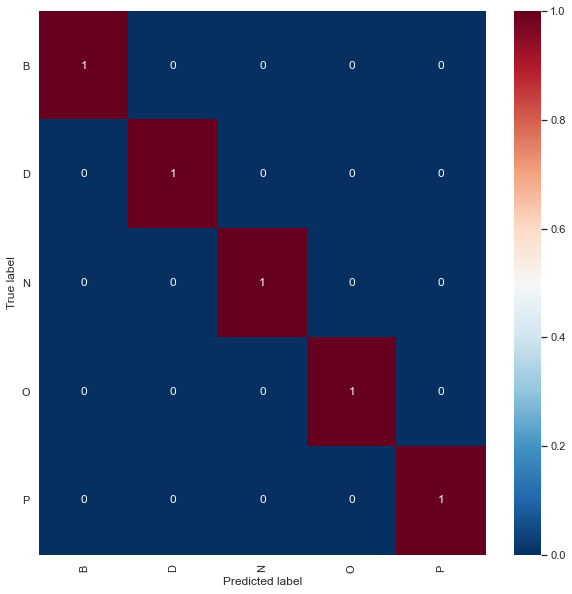

In [64]:
final_params = {'C': 181,
                'gamma': 0.0005}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

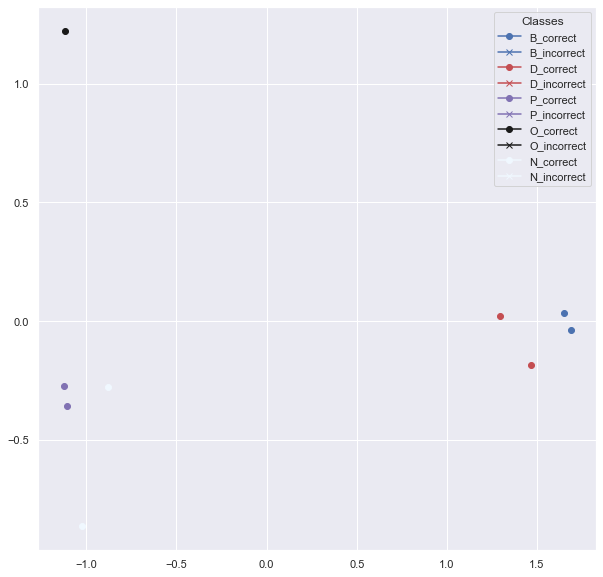

In [68]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['B_correct', 'B_incorrect', 'D_correct', 'D_incorrect', 'P_correct', 'P_incorrect',
                'O_correct', 'O_incorrect', 'N_correct', 'N_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

There is sufficient signal present in the smaller array to enable unambiguous identification of the 5 FA classes tested, so in this case the additional barrels in the larger array do not provide any extra information.